<a href="https://colab.research.google.com/github/lo-lim/Hospital-opening-or-closing/blob/main/Hospital_opening_or_closing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 탐색 및 주제**

**의료기관이 폐업했는지 여부를 포함하여 2016년, 2017년의 재무정보와 병원 기본정보를 바탕으로 개폐엽 여부를 알아보자 .**


- 재무정보와 병원 기본정보 데이터를 이용한 분류 및 예측과 인사이트 도출 
- 분석에 사용할 데이터 정보  
 * OC: 영업/폐업 분류 --> **종속변수 (2개의 class)** 
   * **open**(영업)  
     **close**(폐업)

 * 나머지 57개 변수들 --> **독립변수**
    * **inst_id** - 각 파일에서의 병원 고유 번호  
      **sido** – 병원의 광역 지역 정보  
      **sgg** – 병원의 시군구 자료   
      **openDate** – 병원 설립일  
      **bedCount** - 병원이 갖추고 있는 병상의 수  
      **instkind** – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류  
      **revenue** – 매출액  
      **salescost** – 매출원가  
      **sga** - 판매비와 관리비  
      **salary** – 급여  
      **noi** – 영업외수익  
      **noe** – 영업외비용  
      **Interest** – 이자비용  
      **ctax** – 법인세비용  
      **Profit** – 당기순이익  
      **liquidAsset** – 유동자산  
      **quickAsset** – 당좌자산  
      **receivableS** - 미수금(단기)  
      **inventoryAsset** – 재고자산  
      **nonCAsset** – 비유동자산  
      **tanAsset** – 유형자산  
      **OnonCAsset** - 기타 비유동자산  
      **receivableL** – 장기미수금  
      **debt** – 부채총계  
      **liquidLiabilities**– 유동부채  
      **shortLoan**– 단기차입금  
      **NCLiabilities** – 비유동부채  
      **longLoan**– 장기차입금  
      **netAsset** – 순자산총계  
      **surplus** – 이익잉여금  
      **employee**– 고용한 총 직원의 수  
      **ownerChange** – 대표자의 변동  
        **(1: 2017(회계년도)년, 2: 2016(회계년도)년 데이터를 의미함)**
 
 *  계량형척도의 독립변수들 이용--> **파생변수**
    * **유동비율(%):** 유동자산/유동부채* 100   
      **당좌비율(%):**  당좌자산 / 유동부채 * 100  
      **부채비율(%):** 부채(부채총계) / 자기자본(순자산총계) * 100  
      **고정비율(%):**  고정자산(비유동자산) / 자기자본(순자산총계) * 100  
      **총자산:**  순자산총계 + 부채총계  
      **총자산회전율(회):** 매출액 / 총자산  
      **ROI(%):** 순이익(당기순이익) / 총자산 * 100  
      **ROE(%):** 순이익(당기순이익) / 자기자본(순자산총계) * 100  
      **ROS(%):** 순이익(당기순이익) / 매출액 * 100  
      **총자산증가율(%):** (당기총자산-전기총자산) / 전기총자산 * 100-100  
      **매출액증가율(%):** (당기매출액-전기매출액) / 전기매출액 * 100  
      **순이익증가율(%):** (당기순이익-전기순이익) / 전기순이익 * 100  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (2,845 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=2cddd40065a85063dad13788d21f92caec9722c7c52266d1ddaf1623fdb08fb6
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.1 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import mglearn
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt  # Matplotlib의 pyplot 로딩하기
import pandas as pd
import numpy as np

#**데이터 불러오기 및 전처리**

## **train 데이터 불러오기**

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3학년-2학기 /아비혁/실습파일(csv)/train.csv') #구글 드라이브 이용해서 파일 불러오기 
# train = pd.read_csv('https://raw.githubusercontent.com/hyeoooniii43/ITB_2022_2/main/train.csv') #깃허브 이용해서 파일 불러오기
display(train)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN


In [ ]:
train.columns   # train 데이터의 변수 값들 

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange'],
      dtype='object')

In [ ]:
# 변수들의 값 소수점 3번 째 자리까지 변환 

pd.options.display.float_format = '{:.3f}'.format  
train

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.000,nursing_hospital,4217530010.000,0.000,3961134739.000,...,758993742.000,222876855.000,0.000,536116887.000,390000000.000,2619290493.000,1271224493.000,62.000,64.000,same
1,3,open,gyeongnam,32,19970401,410.000,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.000,813.000,same
2,4,open,gyeonggi,89,20161228,468.000,nursing_hospital,1004521989.000,515483669.000,447219722.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,1.000,same
3,7,open,incheon,141,20000814,353.000,general_hospital,72507342181.000,0.000,70677397660.000,...,37755010512.000,17018596586.000,9219427379.000,20736413926.000,15100000000.000,12954271998.000,7740829037.000,663.000,663.000,same
4,9,open,gyeongnam,32,20050901,196.000,general_hospital,49043538016.000,0.000,47656051197.000,...,51432592890.000,30072585842.000,17593752360.000,21360007048.000,14108027465.000,5561941.000,9025549604.000,206.000,197.000,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.000,nursing_hospital,7614696536.000,415347464.000,5903119133.000,...,9423771130.000,2618201328.000,0.000,6805569802.000,5930000000.000,5379501732.000,811641602.000,193.000,141.000,same
297,423,close,choongnam,159,20140618,NaN,hospital,6717143911.000,8200000000.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,79.000,79.000,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000,0.000,54794278.000,...,6370097200.000,2170972735.000,0.000,4199124465.000,2498749346.000,3259161079.000,0.000,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.000,nursing_hospital,2116892231.000,268174808.000,3286244912.000,...,639233573.000,6400000000.000,0.000,0.000,0.000,0.000,0.000,100.000,NaN,NaN


In [ ]:
#info 함수로 train 데이터 탐색

train.info() #int, object, float 척도로 구성되어 있음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [ ]:
# inst_id, sgg(불필요한 변수) 제거

train = train.drop(['inst_id', 'sgg'], axis=1) # 병원 고유 번호 및 시군구 변수 제거 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OC                  301 non-null    object 
 1   sido                301 non-null    object 
 2   openDate            301 non-null    int64  
 3   bedCount            296 non-null    float64
 4   instkind            300 non-null    object 
 5   revenue1            293 non-null    float64
 6   salescost1          293 non-null    float64
 7   sga1                293 non-null    float64
 8   salary1             293 non-null    float64
 9   noi1                293 non-null    float64
 10  noe1                293 non-null    float64
 11  interest1           293 non-null    float64
 12  ctax1               293 non-null    float64
 13  profit1             293 non-null    float64
 14  liquidAsset1        293 non-null    float64
 15  quickAsset1         293 non-null    float64
 16  receivab

## **결측치 처리하기(보간&제거)**


**1) 'instkind' 변수 결측치 보간**

In [ ]:
# instkind 결측지를 최다빈수 값으로 채우기

print(train['instkind'].value_counts())
train['instkind'] = train['instkind'].fillna('nursing_hospital')

print('-'*50)
train['instkind'].isnull().sum()  

#결측치를 보간했기 때문에 isnull.sum()=0으로 나옴 

nursing_hospital        144
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64
--------------------------------------------------


0

**2) 'ownerChange' 변수 결측치 보간**

In [ ]:
#ownerChange 변수의 전체 비율을 반영하여 대체 

train['ownerChange'].isnull().sum()  #결측치 총 12개 

12

In [ ]:
round(train['ownerChange'].value_counts(normalize=True),3)  #2개의 class 비율 구하기 

same     0.855
change   0.145
Name: ownerChange, dtype: float64

In [ ]:
train['ownerChange']=train['ownerChange'].fillna(pd.Series(np.random.choice(['same', 'change'],
                                                                           p=[0.85, 0.15], size=301))) #size=전체 행 개수 
train['ownerChange'].isnull().sum()  #결측치를 보간했기에 isnull.sum=0

0

same      259
change     42
Name: ownerChange, dtype: int64


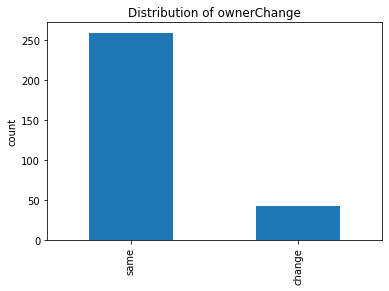

In [ ]:
print(train['ownerChange'].value_counts())

train['ownerChange'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of ownerChange')
plt.show()

#결측치가 잘 보간됨 

**3) 'bedcount' 결측치 보간**

In [ ]:
#bedCount 결측지를 instkind별 평균으로 대체
print(train.groupby('instkind')['bedCount'].mean())
train['bedCount'] = train['bedCount'].fillna(train.groupby('instkind')['bedCount'].transform('mean'))

print('-'*50)

train['bedCount'].isnull().sum() #결측치를 보간했기에 isnull.sum=0

instkind
clinic                   4.444
dental_clinic            0.000
general_hospital       261.568
hospital                96.221
nursing_hospital       172.340
traditional_clinic       0.000
traditional_hospital    46.667
Name: bedCount, dtype: float64
--------------------------------------------------


0

**4) 'employee1,2' 결측치 보간**

In [ ]:
#employee1 결측지를 instkind별 평균으로 대체
print(train.groupby('instkind')['employee1'].mean())
train['employee1'] = train['employee1'].fillna(train.groupby('instkind')['employee1'].transform('mean'))

print('-'*50)

train['employee1'].isnull().sum() #결측치를 보간했기에 isnull.sum=0

instkind
clinic                  84.765
dental_clinic          107.000
general_hospital       406.216
hospital               125.488
nursing_hospital        97.239
traditional_clinic      79.667
traditional_hospital    45.000
Name: employee1, dtype: float64
--------------------------------------------------


0

In [ ]:
#employee2 결측지를 instkind별 평균으로 대체
print(train.groupby('instkind')['employee2'].mean())
train['employee2'] = train['employee2'].fillna(train.groupby('instkind')['employee2'].transform('mean'))

print('-'*50)

train['employee2'].isnull().sum()  #결측치를 보간했기에 isnull.sum=0

instkind
clinic                  79.824
dental_clinic          109.000
general_hospital       386.389
hospital               116.012
nursing_hospital        93.186
traditional_clinic      77.333
traditional_hospital    41.000
Name: employee2, dtype: float64
--------------------------------------------------


0

**5) 금융데이터(renvenue1~surplus2) 모두 동일 행에 결측치 있어 행 삭제**

In [ ]:
#나머지 결측치 8개는 동일한 행에 있어서 모두 제거

train[train['revenue1'].isnull()]  #총 8개의 행에서 금융데이터에 동일하게 결측치 존재함을 확인함 

,OC,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
1,open,gyeongnam,19970401,410.000,general_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.000,813.000,same
14,open,ulsan,20160531,237.000,general_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.000,901.000,same
32,open,incheon,19930708,232.000,general_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.000,323.000,same
55,open,gyeonggi,20130314,327.000,nursing_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000,203.000,same
60,open,gangwon,20031201,244.000,nursing_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.239,93.186,same
248,open,gyeonggi,20040303,255.000,general_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.000,244.000,same
257,open,choongnam,19861212,50.000,nursing_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.000,89.000,same
258,open,gyeongbuk,20141219,0.000,clinic,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.765,79.824,same


In [ ]:
train = train.dropna()
train.isnull().sum()

#결측치 존재하는 행 삭제 및 보간으로 모든 변수에 결측치 없이 전처리 완료함. 
#isnull().sum() 함수를 통해서 모든 변수에서 결측치가 0으로 즉 존재하지 않음을 확인함. 

OC                    0
sido                  0
openDate              0
bedCount              0
instkind              0
revenue1              0
salescost1            0
sga1                  0
salary1               0
noi1                  0
noe1                  0
interest1             0
ctax1                 0
profit1               0
liquidAsset1          0
quickAsset1           0
receivableS1          0
inventoryAsset1       0
nonCAsset1            0
tanAsset1             0
OnonCAsset1           0
receivableL1          0
debt1                 0
liquidLiabilities1    0
shortLoan1            0
NCLiabilities1        0
longLoan1             0
netAsset1             0
surplus1              0
revenue2              0
salescost2            0
sga2                  0
salary2               0
noi2                  0
noe2                  0
interest2             0
ctax2                 0
profit2               0
liquidAsset2          0
quickAsset2           0
receivableS2          0
inventoryAsset2 

## **일부 독립변수 척도 변경**

gyeonggi     47
gyeongbuk    38
gyeongnam    34
busan        26
choongnam    22
jeonnam      21
seoul        19
jeonbuk      18
daegu        14
choongbuk    13
daejeon      13
incheon       9
gangwon       9
ulsan         7
gwangju       2
sejong        1
Name: sido, dtype: int64


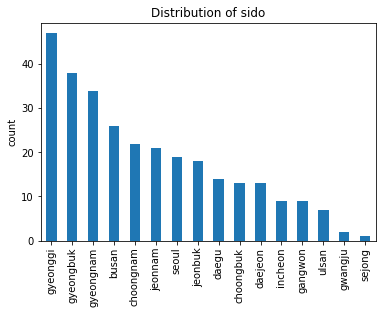

--------------------------------------------------
nursing_hospital        142
hospital                 88
general_hospital         33
clinic                   17
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64


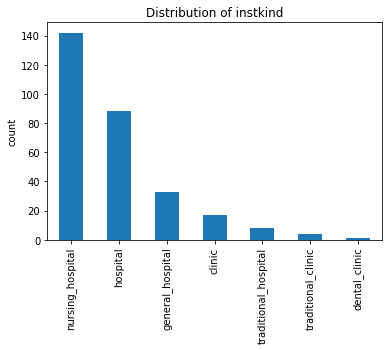

--------------------------------------------------
same      251
change     42
Name: ownerChange, dtype: int64


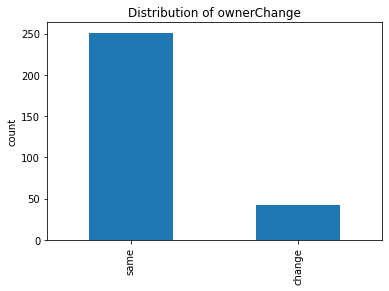

In [ ]:
# 'sido', 'instkind', 'ownerChange' 를 내림차순 기준으로 시각화 
# 레이블인코더 진행후 값과 비교하기 위한 원본 value값에 대한 시각화 

from matplotlib import pyplot as plt

print(train['sido'].value_counts())

train['sido'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of sido')
plt.show()


print('-'*50)

print(train['instkind'].value_counts())

train['instkind'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of instkind')
plt.show()

print('-'*50)

print(train['ownerChange'].value_counts())

train['ownerChange'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of ownerChange')
plt.show()


In [ ]:
# 종속변수 'OC'를 제외한, 척도가 object인 'sido' , 'instkind' 'ownerChage' 변수 LabelEncoder 실행하기 --> object 데이터를 수치형으로 변환
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train['sido'] = train.loc[:,['sido']].apply(lambda x : LE.fit_transform(x))
train['instkind'] = train.loc[:,['instkind']].apply(lambda x : LE.fit_transform(x))
train['ownerChange'] = train.loc[:,['ownerChange']].apply(lambda x : LE.fit_transform(x))

display(train)      

,OC,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,open,2,20071228,175.000,4,4217530010.000,0.000,3961134739.000,2033835290.000,15652441.000,...,758993742.000,222876855.000,0.000,536116887.000,390000000.000,2619290493.000,1271224493.000,62.000,64.000,1
2,open,8,20161228,468.000,4,1004521989.000,515483669.000,447219722.000,296402310.000,76156.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,1.000,1
3,open,10,20000814,353.000,2,72507342181.000,0.000,70677397660.000,31786048663.000,506223059.000,...,37755010512.000,17018596586.000,9219427379.000,20736413926.000,15100000000.000,12954271998.000,7740829037.000,663.000,663.000,1
4,open,9,20050901,196.000,2,49043538016.000,0.000,47656051197.000,24460782270.000,112352259.000,...,51432592890.000,30072585842.000,17593752360.000,21360007048.000,14108027465.000,5561941.000,9025549604.000,206.000,197.000,1
5,open,9,20020501,243.000,2,33580536703.000,9222996930.000,23727912054.000,16655333342.000,65414325.000,...,0.000,21861133888.000,17087136895.000,20000000.000,0.000,0.000,5879003604.000,397.000,390.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,open,12,20050211,214.000,4,7614696536.000,415347464.000,5903119133.000,3467861240.000,42098974.000,...,9423771130.000,2618201328.000,0.000,6805569802.000,5930000000.000,5379501732.000,811641602.000,193.000,141.000,1
297,close,2,20140618,96.221,3,6717143911.000,8200000000.000,0.000,0.000,186359.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,79.000,79.000,1
298,close,7,19830705,96.221,3,0.000,0.000,54794278.000,7500000.000,121022160.000,...,6370097200.000,2170972735.000,0.000,4199124465.000,2498749346.000,3259161079.000,0.000,125.488,116.012,1
299,close,8,20070101,180.000,4,2116892231.000,268174808.000,3286244912.000,2231944446.000,123665065.000,...,639233573.000,6400000000.000,0.000,0.000,0.000,0.000,0.000,100.000,93.186,1


8     47
7     38
9     34
0     26
2     22
12    21
14    19
11    18
3     14
1     13
4     13
10     9
5      9
15     7
6      2
13     1
Name: sido, dtype: int64


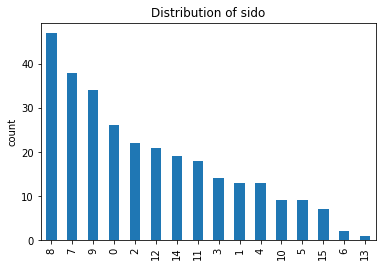

--------------------------------------------------
4    142
3     88
2     33
0     17
6      8
5      4
1      1
Name: instkind, dtype: int64


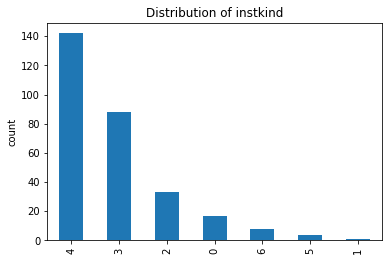

--------------------------------------------------
1    251
0     42
Name: ownerChange, dtype: int64


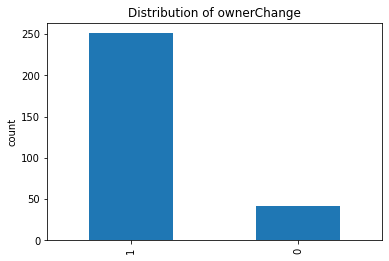

In [ ]:
#LabelEncoder 실행후 내림차순 기준으로 시각화 

print(train['sido'].value_counts())

train['sido'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of sido')
plt.show()


print('-'*50)

print(train['instkind'].value_counts())

train['instkind'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of instkind')
plt.show()

print('-'*50)

print(train['ownerChange'].value_counts())

train['ownerChange'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of ownerChange')
plt.show()

In [ ]:
## 'opendate' 년도 부분만 추출 ##
train['openDate']=train['openDate'].apply(lambda x: int(str(x)[:4])) 
train.rename(columns={'openDate': 'openYear'}, inplace=True) 

In [ ]:
train[['openYear']]  #년도 부분만 추출되었음을 확인 

,openYear
0,2007
2,2016
3,2000
4,2005
5,2002
...,...
296,2005
297,2014
298,1983
299,2007


## **계량형 척도 이상치 제거**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3be3e5dd90>,
      dtype=object)

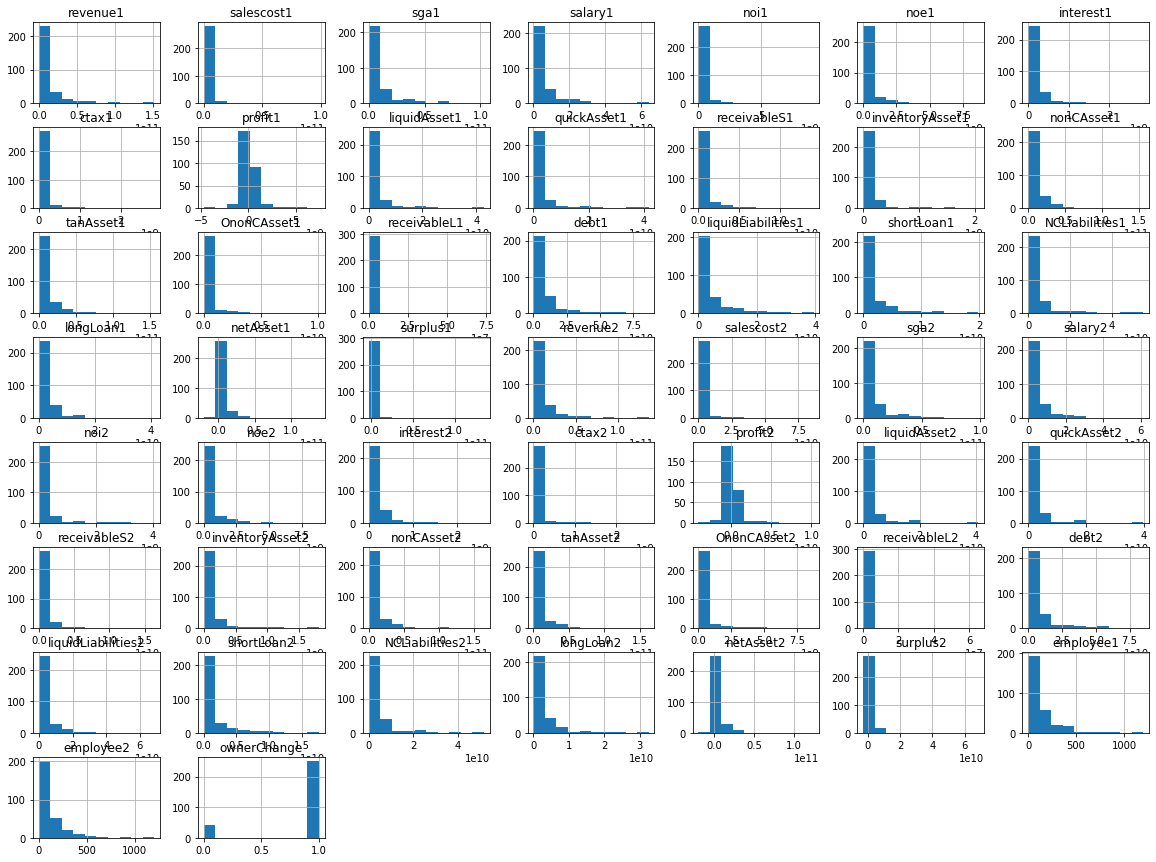

In [ ]:
df=train.drop(['sido', 'openYear', 'bedCount', 'instkind'], axis=1)  #계량형 척도들의 변수들만 있는 df 데이터프레임 생성 
pd.DataFrame(df).hist(figsize=(20,15))

#불균형하게 한 쪽으로 치우쳐져 있음을 시각화로 알 수 있음----> Min-max, standard 스케일링, 이상치 제거 중에서 이상치 제거 방법으로 전처리 진행 

In [ ]:
# 일정 범위 기준 이하거나 이상인 애들 이상치로 판단하고 제거 
def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)  
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 3  # 제거 범위 조절 변수
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff

train_columns= ['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2']

remove_out(train, train_columns)

,OC,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,open,8,2016,468.000,4,1004521989.000,515483669.000,447219722.000,296402310.000,76156.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,1.000,1
1,close,8,2013,132.000,4,2681765580.000,180200922.000,2014579640.000,936645110.000,59924069.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,51.000,93.186,0
2,open,3,2006,166.000,3,12672510066.000,1319791505.000,11298752426.000,6514154575.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,132.000,132.000,1
3,close,7,2007,203.000,3,5423356760.000,0.000,5212041365.000,2958249630.000,23843435.000,...,2733619459.000,140619459.000,0.000,2590000000.000,2590000000.000,3752184128.000,0.000,125.488,116.012,1
4,open,8,2005,112.000,4,3727356228.000,609057643.000,3087298594.000,1903763407.000,7255354.000,...,2623767450.000,1735572518.000,500000000.000,888194932.000,0.000,0.000,0.000,50.000,50.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,open,2,2009,159.000,4,3264274401.000,89372933.000,2758200772.000,1453934870.000,37797050.000,...,3684848908.000,48659938.000,0.000,3636188970.000,3636188970.000,3739327795.000,0.000,51.000,59.000,1
60,open,7,2009,35.000,4,1518810590.000,118204492.000,1280711715.000,911366820.000,3794477.000,...,1316884502.000,296884502.000,0.000,1020000000.000,1020000000.000,1565327950.000,0.000,17.000,17.000,1
61,open,1,2014,158.000,4,3514459789.000,162262494.000,3098506803.000,1831216841.000,28748506.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,53.000,49.000,0
62,open,2,2009,0.000,0,663950938.000,3479105.000,680570092.000,443978109.000,68479716.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,21.000,23.000,1


- 다수의 계량형 척도들의 변수의 분포가 한쪽으로 불균형하게 치우쳐져 있음을 시각화 결과로 알 수 있음>이를 해결하기 위해 분포를 균형 있게 맞춰주는 min-max 스케일링 또는 standard 스케일링을 계량형 척도 변수에 적용한 후 히스토그램으로 다시 시각화 했지만, 동일하게 둘 다 한 쪽으로 불균형하게 치우쳐지는 결과가 나타남.   

- 따라서 스케일링이 아니라 계량형 척도의 변수들의 값들 중에서 이상치가 있음을 가정하고 각 변수들의 평균과 표준편차를 기준값을 구하고 이 기준값 이상이거나 이하인 값들을 제거하는 과정을 실시함.

- 하지만 최종적으로 64행 밖에 남지 않았고 원본 데이터의 계량형 척도의 변수들이 '돈' 이라는 특성 상 이상치가 존재할 수 밖에 없기 때문에 결론적으로는 이상치 제거하는 과정을 생략하려 함.    

**----> 최종적으로 이상치 제거를 하기 전 293행의 데이터프레임으로 진행**

#**머신러닝 실행**



## **x,y 및 train/test 나누기**

In [ ]:
train  #모든 데이터 전처리 진행한 293행의 train 데이터프레임 

,OC,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,open,2,2007,175.000,4,4217530010.000,0.000,3961134739.000,2033835290.000,15652441.000,...,758993742.000,222876855.000,0.000,536116887.000,390000000.000,2619290493.000,1271224493.000,62.000,64.000,1
2,open,8,2016,468.000,4,1004521989.000,515483669.000,447219722.000,296402310.000,76156.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,1.000,1
3,open,10,2000,353.000,2,72507342181.000,0.000,70677397660.000,31786048663.000,506223059.000,...,37755010512.000,17018596586.000,9219427379.000,20736413926.000,15100000000.000,12954271998.000,7740829037.000,663.000,663.000,1
4,open,9,2005,196.000,2,49043538016.000,0.000,47656051197.000,24460782270.000,112352259.000,...,51432592890.000,30072585842.000,17593752360.000,21360007048.000,14108027465.000,5561941.000,9025549604.000,206.000,197.000,1
5,open,9,2002,243.000,2,33580536703.000,9222996930.000,23727912054.000,16655333342.000,65414325.000,...,0.000,21861133888.000,17087136895.000,20000000.000,0.000,0.000,5879003604.000,397.000,390.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,open,12,2005,214.000,4,7614696536.000,415347464.000,5903119133.000,3467861240.000,42098974.000,...,9423771130.000,2618201328.000,0.000,6805569802.000,5930000000.000,5379501732.000,811641602.000,193.000,141.000,1
297,close,2,2014,96.221,3,6717143911.000,8200000000.000,0.000,0.000,186359.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,79.000,79.000,1
298,close,7,1983,96.221,3,0.000,0.000,54794278.000,7500000.000,121022160.000,...,6370097200.000,2170972735.000,0.000,4199124465.000,2498749346.000,3259161079.000,0.000,125.488,116.012,1
299,close,8,2007,180.000,4,2116892231.000,268174808.000,3286244912.000,2231944446.000,123665065.000,...,639233573.000,6400000000.000,0.000,0.000,0.000,0.000,0.000,100.000,93.186,1


In [ ]:
from sklearn.model_selection import train_test_split


X = train.loc[:, 'sido':'ownerChange']  # 종속변수 'OC'를 제외한 나머지 변수들을 x에 할당 
y = train.loc[:, 'OC']   # target 변수(종속변수) 'OC' 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) #test_size를 0.20로 설정 

open      278
 close     15
Name: OC, dtype: int64


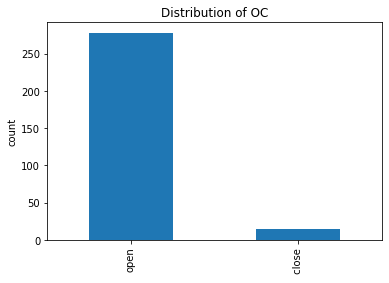

In [ ]:
#종속변수 'OC'를 내림차순 기준으로 시각화 

print(train['OC'].value_counts())

train['OC'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of OC')
plt.show()

#매우 불균형하게 분호되어 있음. (close 값이 상대적으로 너무 적음)

##**DecisionTreeClassifier(의사결정나무)** 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

#의사결정나무 모델의 디폴트 값으로 진행하면 학습용 데이터가 100으로 과적합 상태가 발생됨 --> 추가 옵션(파라미터) 실행 

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.898


**수동으로 직접 넣지 않고 설정한 범위내에서 자동으로 최적의 파라미터를 구해주는 Grid Search 실행**

 **최적의 파라미터: Grid search**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'max_depth': range(4,21), 'min_samples_leaf': range(1,11)}  #의사결정나무의 깊이와 마지막 잎 노드의 개수를 범위를 지정해서 설정 

In [ ]:
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(4, 21),
                         'min_samples_leaf': range(1, 11)},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_)) #max_depth=4, min_samples_leaf=10이 최적의 파라미터 

Best Parameter: {'max_depth': 4, 'min_samples_leaf': 10}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.949


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.949


In [ ]:
tree= DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.949
시험용 데이터 정확도: 0.949


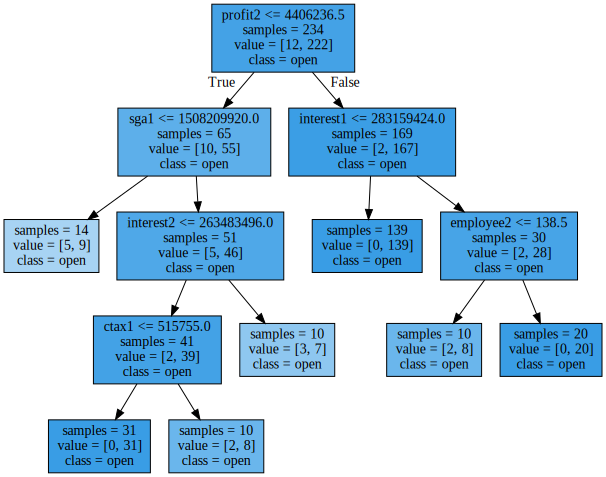

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz


# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=["close", "open"],
                feature_names=train.columns[1:], impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
# 머신러닝 모델에 활용할 변수 중요도 함수 생성(추후 나머지 모델들에게도 적용할 함수 )
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(train.columns[1:])  #종속변수를 제외한 나머지 변수들 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')  #x축의 변수명이 길어서 x축과 y축을 바꿔서 보기 편하게 만듦 
    plt.yticks(np.arange(n_features), train.columns[1:], rotation=20)   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

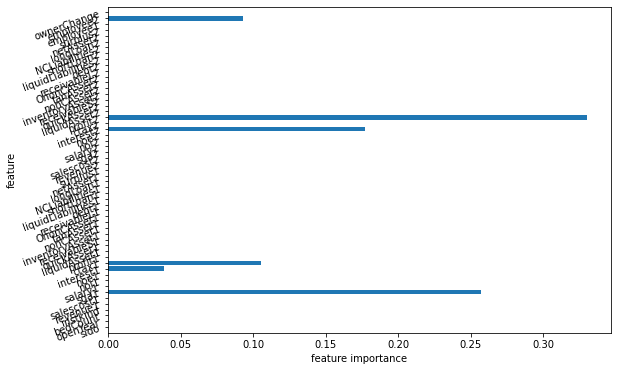

In [ ]:
plot_feature_importances_wisc(tree) #위에 지정한 함수 이름을 불러오고 생성한 tree 모델을 함수에 적용 

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.         0.         0.         0.
 0.2569213  0.         0.         0.         0.03820631 0.10536735
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.17676189 0.
 0.32983861 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.09290454
 0.        ]


In [ ]:
res = pd.DataFrame(result)
res["name"] = train.columns[1:]
res.rename(columns={0:'importance figure'}, inplace=True)
display(res.info())
display(res.sort_values(by='importance figure', ascending=False)) #중요도 수치로 내림차순 정렬

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   importance figure  55 non-null     float64
 1   name               55 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1008.0+ bytes


None

,importance figure,name
36,0.330,profit2
6,0.257,sga1
34,0.177,interest2
11,0.105,ctax1
53,0.093,employee2
10,0.038,interest1
0,0.000,sido
41,0.000,nonCAsset2
31,0.000,salary2
32,0.000,noi2


## **랜덤 포레스트 (Random forest)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators': range(1,50)}
grid_search_2=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(1, 50)},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search_2.best_params_))

Best Parameter: {'n_estimators': 13}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search_2.best_score_))
print("Test set Score: {:.3f}".format(grid_search_2.score(X_test, y_test)))

Best Cross-validity Score: 0.949
Test set Score: 0.949


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=13, random_state=0) 
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))



학습용 데이터 세트 정확도: 0.987
시험용 데이터 세트 정확도: 0.949


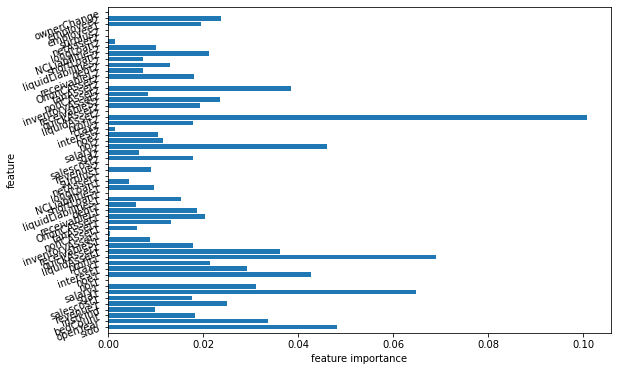

In [ ]:
#단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨

plot_feature_importances_wisc(forest) #위에서 만든 변수의 중요도 확인할 수 있는 함수 불러와서 forest 모델에 적용 

In [ ]:
result_2 = forest.feature_importances_
print("변수의 중요도:\n", result_2)

print('-'*50)

res = pd.DataFrame(result_2)
res["name"] = train.columns[1:]
res.rename(columns={0:'importance figure'}, inplace=True)
display(res.info())
display(res.sort_values(by='importance figure', ascending=False)) #중요도 수치로 내림차순 정렬


변수의 중요도:
 [0.04813312 0.03358073 0.01834603 0.00982942 0.02503178 0.01753672
 0.06489168 0.03107511 0.         0.04263851 0.02925002 0.02137769
 0.06896519 0.03620359 0.0178738  0.00873048 0.00033395 0.00602679
 0.01313226 0.02045799 0.01867416 0.00578531 0.01534237 0.
 0.00954545 0.00438312 0.         0.00909091 0.         0.01790295
 0.00642433 0.04614606 0.01154835 0.0105149  0.00132244 0.01777778
 0.10075949 0.         0.01938008 0.02354427 0.00825397 0.03856398
 0.         0.01794578 0.00739518 0.0130458  0.00722496 0.02130682
 0.00998051 0.00133333 0.         0.         0.0194658  0.02371063
 0.00021645]
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   importance figure  55 non-null     float64
 1   name               55 non-null     object 
dtypes: float64(1), object(1)
memory 

None

,importance figure,name
36,0.101,profit2
12,0.069,profit1
6,0.065,sga1
0,0.048,sido
31,0.046,salary2
9,0.043,noe1
41,0.039,nonCAsset2
13,0.036,liquidAsset1
1,0.034,openYear
7,0.031,salary1


## **그래디언트 부스팅 (Gradient Boosting)**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0)  #디폴트 값으로 옵션을 두고 그래디언트 부스팅을 적용한 gbrt모델 생성
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1(학습률)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

#학습용 데이터가 100이 나와서 과적합 상태---> 옵션(파라미터) 추가해서 과적합 문제 보완하는 과정을 추후 진행 

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.949


In [ ]:
param_grid= {'max_depth': range(1,20), 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [ ]:
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=param_grid, cv=3, refit=True)   #가장 최적의 패러미터가 나오면 이 값을 이 모델이 적용시기키 위해 refit=True 설정 

# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': range(1, 20)})

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.02, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.9444


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.02, max_depth=1)  
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.953
시험용 데이터 세트 정확도: 0.949


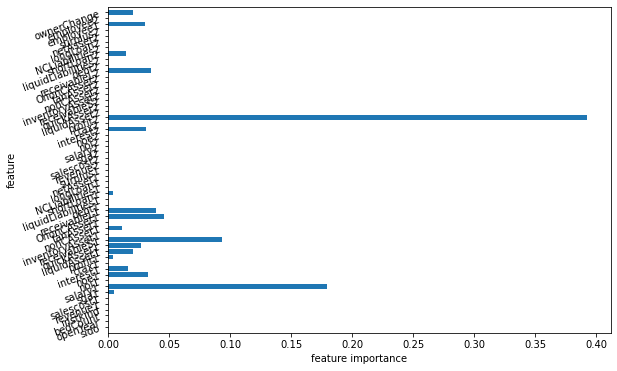

In [ ]:
plot_feature_importances_wisc(gbrt)  #위에서 생성한 중요도를 구하는 함수에 gbrt 모델 적용 

In [ ]:
result_3 = gbrt.feature_importances_
print("변수의 중요도:\n", result_3)

print('-'*50)

res = pd.DataFrame(result_3)
res["name"] = train.columns[1:]
res.rename(columns={0:'importance figure'}, inplace=True)
display(res.info())
display(res.sort_values(by='importance figure', ascending=False)) #중요도 수치로 내림차순 정렬


변수의 중요도:
 [0.         0.         0.         0.         0.         0.
 0.00463499 0.17939173 0.         0.03214276 0.01646827 0.
 0.00404608 0.02025749 0.02677393 0.09276022 0.         0.01120576
 0.         0.04599937 0.03898271 0.         0.         0.00382744
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03101373 0.
 0.39198241 0.         0.         0.         0.         0.
 0.         0.         0.03528753 0.         0.         0.01458045
 0.         0.         0.         0.         0.03039467 0.
 0.02025045]
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   importance figure  55 non-null     float64
 1   name               55 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1008.0+ bytes


None

,importance figure,name
36,0.392,profit2
7,0.179,salary1
15,0.093,receivableS1
19,0.046,OnonCAsset1
20,0.039,receivableL1
44,0.035,receivableL2
9,0.032,noe1
34,0.031,interest2
52,0.030,employee1
14,0.027,quickAsset1


## **K-최근접 이웃(K-Nearest Neighbor)모델**

**GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n = 50 #k의 값의 범위를 50까지 설정 
param_list = []
for i in range(1, n+1):
  param_list.append(i)

param_grid={'n_neighbors': param_list}

In [ ]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score = True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'n_neighbors': 3}
Best Cross-validity Score: 0.949
Test set Score: 0.949


**n_neigbors=3 일 때가 최적의 파라미터**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn3=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn3.fit(X_train, y_train) #n_neighbors=3일 때의 모델을 생성해서 적용 

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("학습 데이터 세트 정확도: {:.3f}".format(knn3.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(knn3.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.953
시험용 데이터 세트 정확도: 0.949


#**4가지 모델 비교**

## **정오 분류표(Confusion Matrx) 비교**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test의 값들과 개수를 보여줌 

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = gbrt.predict(X_test)
knn_pred = knn3.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))
print('KNN 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, knn_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

#4가지 모델다 시험용 데이터의 정확도가 0.949로 동일 

open      56
 close     3
Name: OC, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.949
[[ 0  3]
 [ 0 56]]
Random forest 시험용 데이터 세트 정확도:0.949
[[ 0  3]
 [ 0 56]]
Gradient boosting 시험용 데이터 세트 정확도:0.949
[[ 0  3]
 [ 0 56]]
KNN 시험용 데이터 세트 정확도:0.949
[[ 0  3]
 [ 0 56]]


## **교차검증 (Cross Validation) 비교**

In [ ]:
# 4가지 모델에 각각의 최적의 파라미터 적용해서 비교하기 


tree= DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=0)
tree.fit(X_train, y_train)

forest = RandomForestClassifier(n_estimators=13, random_state=0)
forest.fit(X_train, y_train)

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.02, max_depth=1)   
gbrt.fit(X_train, y_train)

knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score  #cv=15로 설정 
dt_scores = cross_val_score(tree, X_train, y_train, cv=15, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=15, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=15, scoring='accuracy')  
knn_scores= cross_val_score(knn3, X_train, y_train, cv=15, scoring='accuracy' )

print("="*50)
print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 
print("K-Nearest Neighbor: ", knn_scores)  

print("="*50)
print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 
print("K-Nearest Neighbor :{:.3f}".format(knn_scores.mean())) 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"


Accuracy
Decision tree:  [0.9375     0.9375     0.9375     0.9375     0.9375     0.9375
 0.9375     0.9375     0.9375     1.         1.         1.
 0.93333333 0.93333333 0.93333333]
Random forest:  [0.9375     0.9375     0.9375     0.9375     0.9375     0.9375
 0.9375     0.9375     0.9375     1.         1.         1.
 0.93333333 0.93333333 0.93333333]
Gradient boosting:  [0.9375     0.9375     0.9375     0.9375     0.9375     0.9375
 0.9375     0.9375     0.9375     1.         1.         1.
 0.86666667 0.93333333 0.93333333]
K-Nearest Neighbor:  [0.9375     0.9375     0.9375     0.9375     0.9375     0.9375
 0.9375     0.9375     0.9375     1.         1.         1.
 0.93333333 0.93333333 0.93333333]
Accuracy mean
Decision tree :0.949
Random forest :0.949
Gradient boosting :0.945
K-Nearest Neighbor :0.949


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"


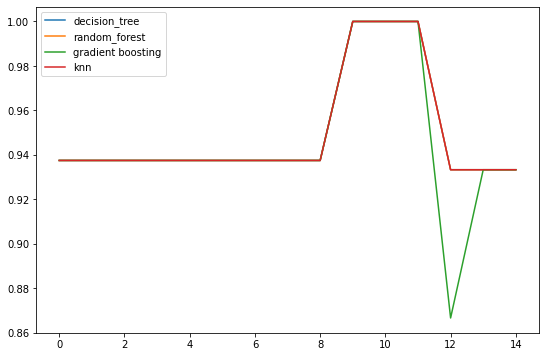

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient boosting', gbrt_scores],
            ['knn', knn_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

# 의사결정나무, 랜덤포레스트, knn이 모두 동일한 그래프를 그리며 3가지 모델이 제일 높은 성능을 보이고, 그래디언트부스팅이 cv=12일 때 가장 낮게 나오는 것을 알 수 있음.

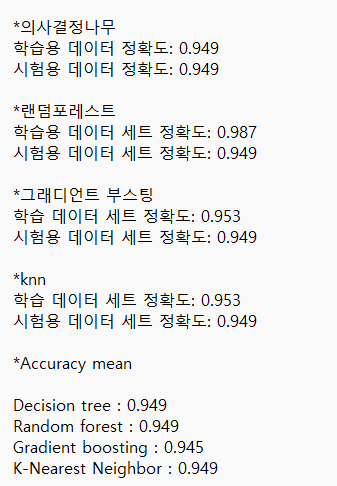

시험용 데이터의 정확도는 4가지 모델에서 동일하게 0.949로 나왔고 추가로 교차검증 실행 후 정확도의 평균이 그래디언트 부스팅 모델을 제외한 모델들이 모두 0.949로 제일 높게 나왔다. 이 3가지 중에서 랜덤포레스트의 학습용 데이터 정확도가 0.987로 가장 높게 나왔기 때문에 최종적으로 랜덤포레스트 모델을 선택.  

**---> 최종적으로 Random forest 모델 선정**

## **pycaret 라이브러리 실행**

In [ ]:
# pycaret 설치
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user
# 위 코드 실행 후 반드시 런타인 재실행!!

Found existing installation: sklearn 0.0.post1
Uninstalling sklearn-0.0.post1:
  Successfully uninstalled sklearn-0.0.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post1-py3-none-any.whl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.utils import enable_colab
enable_colab() #코랩에서 사용 가능하도록 pycaret.utils 임포트

Colab mode enabled.


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached spacy-2.3.8-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.0 MB)
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
  Using cached scipy-1.5.4-cp38-cp38-manylinux1_x86_64.whl (25.8 MB)
  Using cached mlflow-2.0.1-py3-none-any.whl (16.5 MB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached lightgbm-3.3.3-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_6

In [ ]:
pip install numpy --upgrade --ignore-installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.23.5 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.5 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.


In [ ]:
from pycaret.classification import *

In [ ]:
exp = setup(train, target='OC', session_id=123)  #pycaret 라이브러를 실행 후 분석 세팅을 진행 

,Description,Value
0,session_id,123
1,Target,OC
2,Target Type,Binary
3,Label Encoded,"close: 0, open: 1"
4,Original Data,"(293, 56)"
5,Missing Values,False
6,Numeric Features,50
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='OC',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
models()  #다양한 모델들의 종류를 보여줌 

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
compare_models() #Pycaret 라이브러리에 있는 분류 머신러닝 모델들의 정확도와 부수적인 값들을 보여줌---> KNN 모델이 성능이 제일 높게 나옴 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.946,0.480,1.000,0.946,0.972,0.000,0.000,0.062
dummy,Dummy Classifier,0.946,0.500,1.000,0.946,0.972,0.000,0.000,0.010
rf,Random Forest Classifier,0.932,0.519,0.985,0.946,0.965,-0.012,-0.013,0.543
et,Extra Trees Classifier,0.932,0.532,0.985,0.946,0.965,-0.017,-0.018,0.165
qda,Quadratic Discriminant Analysis,0.927,0.490,0.980,0.945,0.962,-0.019,-0.020,0.023
lightgbm,Light Gradient Boosting Machine,0.927,0.528,0.980,0.945,0.962,-0.019,-0.020,0.127
gbc,Gradient Boosting Classifier,0.922,0.500,0.975,0.945,0.959,-0.022,-0.022,0.371
ridge,Ridge Classifier,0.918,0.000,0.965,0.950,0.957,0.071,0.070,0.043
svm,SVM - Linear Kernel,0.893,0.000,0.943,0.943,0.942,-0.043,-0.046,0.033
lda,Linear Discriminant Analysis,0.893,0.518,0.933,0.953,0.942,0.103,0.109,0.017


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
top5 = compare_models(sort='Accuracy', n_select=5)  #Top 5에 해당하는 모델들의 최적의 파라미터 값들을 출력함 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.946,0.480,1.000,0.946,0.972,0.000,0.000,0.047
dummy,Dummy Classifier,0.946,0.500,1.000,0.946,0.972,0.000,0.000,0.009
rf,Random Forest Classifier,0.932,0.519,0.985,0.946,0.965,-0.012,-0.013,0.217
et,Extra Trees Classifier,0.932,0.532,0.985,0.946,0.965,-0.017,-0.018,0.177
qda,Quadratic Discriminant Analysis,0.927,0.490,0.980,0.945,0.962,-0.019,-0.020,0.020
lightgbm,Light Gradient Boosting Machine,0.927,0.528,0.980,0.945,0.962,-0.019,-0.020,0.055
gbc,Gradient Boosting Classifier,0.922,0.500,0.975,0.945,0.959,-0.022,-0.022,0.211
ridge,Ridge Classifier,0.918,0.000,0.965,0.950,0.957,0.071,0.070,0.015
svm,SVM - Linear Kernel,0.893,0.000,0.943,0.943,0.942,-0.043,-0.046,0.023
lda,Linear Discriminant Analysis,0.893,0.518,0.933,0.953,0.942,0.103,0.109,0.016


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), DummyClassifier(constant=None, random_state=123, strategy='prior'), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
             

**pycaret 라이브러리를 이용하여 top5 모델과 최적의 파라미터**  
* **KNeighborsClassifier**: 
                     (algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


* **DummyClassifier**:
                    (constant=None, random_state=123, strategy='prior')

* **RandomForestClassifier**: 
                     (bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


* **ExtraTreesClassifier**:
                       (bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

* **QuadraticDiscriminantAnalysis**:
                                 (priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

                    

- 위에는 각 top5 모델들의 정확도가 가장 높게 나오게 하는 최적의 파라미터 값    

- Top1 모델은 KNN

- 4가지 모델(의사결정나무, 랜덤포레스트, 그래디언부스팅, KNN)을 생성할 때, 애초에 각 모델이 존재하는 모든 옵션들을 설정하지 않고 각 옵션들의 범위를 제한할 때 원하는 범위 값으로만 제한하여 Grid Search 진행했기 때문에, 모든 옵션들을 설정한 채로 최적의 파라미터를 추출하고 정확도가 제일 높은 모델을 뽑아내는 pycaret 라이브러리의 결과와 다르게 나올 수 밖에 없음. 

**---> pycaret 라이브러리에서는 KNN 모델이 1위긴 하지만, 최종적으로 선정한 랜덤포레스트가 그래도 3위로 높은 순위를 보였기 때문에 위에서 진행한 머시러닝 과정들이 무의미하다고 볼 수 없고 꽤 비슷한 정확도를 보였기 때문에 과정들은 꽤 괜찮았다고 봄.**

## **랜덤포레스트 top10 변수 시각화**

In [ ]:
result_2 = forest.feature_importances_
print("변수의 중요도:\n", result_2)

print('-'*50)

res2 = pd.DataFrame(result_2)
res2["name"] = train.columns[1:]
res2.rename(columns={0:'importance figure'}, inplace=True)
display(res2.info())
res2=res2.sort_values(by='importance figure', ascending=False) #중요도 수치로 내림차순 정렬

변수의 중요도:
 [0.04813312 0.03358073 0.01834603 0.00982942 0.02503178 0.01753672
 0.06489168 0.03107511 0.         0.04263851 0.02925002 0.02137769
 0.06896519 0.03620359 0.0178738  0.00873048 0.00033395 0.00602679
 0.01313226 0.02045799 0.01867416 0.00578531 0.01534237 0.
 0.00954545 0.00438312 0.         0.00909091 0.         0.01790295
 0.00642433 0.04614606 0.01154835 0.0105149  0.00132244 0.01777778
 0.10075949 0.         0.01938008 0.02354427 0.00825397 0.03856398
 0.         0.01794578 0.00739518 0.0130458  0.00722496 0.02130682
 0.00998051 0.00133333 0.         0.         0.0194658  0.02371063
 0.00021645]
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   importance figure  55 non-null     float64
 1   name               55 non-null     object 
dtypes: float64(1), object(1)
memory 

None

In [ ]:
# 랜덤포레스트 중요도 top10 추출

res2=res2.head(10)
res2

,importance figure,name
36,0.101,profit2
12,0.069,profit1
6,0.065,sga1
0,0.048,sido
31,0.046,salary2
9,0.043,noe1
41,0.039,nonCAsset2
13,0.036,liquidAsset1
1,0.034,openYear
7,0.031,salary1


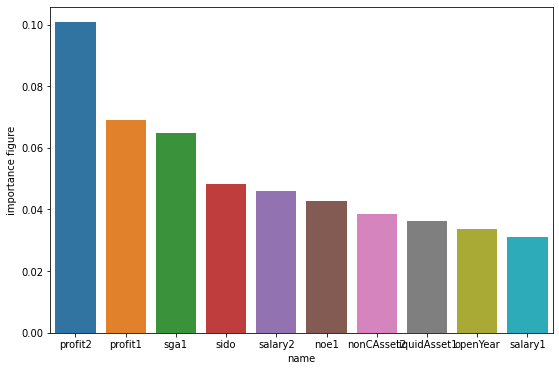

In [ ]:
sns.barplot(data = res2, x = 'name', y = 'importance figure')  #랜덤포레스트 모델의 Top 10의 중요 변수를 시각화로 보여줌 

# **test 전처리 및 RF모델로 예측하기**

## **데이터 불러오기 및 전처리**

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3학년-2학기 /아비혁/실습파일(csv)/test.csv') #구글 드라이브 연동해서 파일 불러오기
# test= pd.read_csv('https://raw.githubusercontent.com/hyeoooniii43/ITB_2022_2/main/test.csv') #깃허브 이용해서 파일 불러오기
display(test)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.000,300.000,general_hospital,66824864410.000,0.000,65657092101.000,...,55406431667.000,50684431667.000,37143344381.000,4720000000.000,4690000000.000,16085395374.000,8944587276.000,693,693,same
1,5,NaN,jeju,149,20160309.000,44.000,hospital,34957575568.000,0.000,32592697196.000,...,67308375170.000,42098280733.000,24200000000.000,25210094437.000,18300000000.000,3789134965.000,0.000,379,371,same
2,6,NaN,jeonnam,103,19890427.000,276.000,general_hospital,23260305967.000,2542570943.000,23087485220.000,...,0.000,27775892339.000,21822782890.000,0.000,0.000,0.000,16385400958.000,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.000,363.000,general_hospital,0.000,0.000,0.000,...,12115167523.000,9556237015.000,4251867179.000,2558930508.000,0.000,39142835592.000,0.000,760,760,same
4,10,NaN,jeonbuk,26,20040604.000,213.000,general_hospital,50370249897.000,0.000,48558027276.000,...,43959732611.000,7535567468.000,3298427375.000,36424165143.000,21347120000.000,25744878066.000,15072685841.000,437,385,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,NaN,jeonnam,33,20011012.000,0.000,traditional_clinic,22330305917.000,848465677.000,18492554091.000,...,15632174080.000,12881803375.000,0.000,2750370705.000,0.000,13849584833.000,0.000,560,NaN,NaN
123,425,NaN,gyeonggi,74,20010530.000,NaN,traditional_hospital,18339061749.000,0.000,17601165049.000,...,3176627772.000,1376741520.000,0.000,1799886252.000,1740000000.000,8574502448.000,7136681406.000,132,137,same
124,429,NaN,gyeonggi,116,20010101.000,150.000,hospital,14242664951.000,1726174241.000,11487224105.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN
125,430,NaN,jeju,76,20010201.000,NaN,NaN,48927096685.000,41571482611.000,4721485293.000,...,37203968971.000,8485918077.000,0.000,28718050894.000,25631200000.000,-205062936.000,0.000,363,343,same


In [ ]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

In [ ]:
# inst_id , sgg(불필요한 변수) 제거

test = test.drop(['inst_id', 'sgg'], axis=1) # 병원 고유 번호 및 시군구 변수 제거 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OC                  0 non-null      float64
 1   sido                127 non-null    object 
 2   openDate            126 non-null    float64
 3   bedCount            119 non-null    float64
 4   instkind            125 non-null    object 
 5   revenue1            125 non-null    float64
 6   salescost1          125 non-null    float64
 7   sga1                125 non-null    float64
 8   salary1             125 non-null    float64
 9   noi1                125 non-null    float64
 10  noe1                125 non-null    float64
 11  interest1           125 non-null    float64
 12  ctax1               125 non-null    float64
 13  profit1             125 non-null    float64
 14  liquidAsset1        125 non-null    float64
 15  quickAsset1         125 non-null    float64
 16  receivab

**결측치 처리하기(보간&제거)**


**1) 'instkind' 변수 결측치 보간**

In [ ]:
# instkind 결측지를 최다빈수 값으로 채우기

print(test['instkind'].value_counts())
test['instkind'] = test['instkind'].fillna('nursing_hospital')

print('-'*50)
test['instkind'].isnull().sum()  
#결측치를 보간했기 때문에 isnull.sum()=0으로 나옴 

nursing_hospital        63
hospital                36
general_hospital        19
clinic                   4
traditional_clinic       2
traditional_hospital     1
Name: instkind, dtype: int64
--------------------------------------------------


0

**2) 'bed_count' 결측치 보간**

In [ ]:
#bed_Count 결측지를 instkind별 평균으로 대체
print(test.groupby('instkind')['bedCount'].mean())
test['bedCount'] = test['bedCount'].fillna(test.groupby('instkind')['bedCount'].transform('mean'))

print('-'*50)

test['bedCount'].isnull().sum() #traditional_hosptial이 1개 뿐인데 이 값이 결측치라서 보간 실패 

instkind
clinic                  12.000
general_hospital       292.211
hospital               102.794
nursing_hospital       187.984
traditional_clinic       0.000
traditional_hospital       NaN
Name: bedCount, dtype: float64
--------------------------------------------------


1

In [ ]:
test['bedCount']=test['bedCount'].replace(np.NaN, -999)  #결측치 값을 -999로 변경 

In [ ]:
test['bedCount'].isnull().sum()

0

**3) 'ownerChange' 변수 결측치 보간**

In [ ]:
#ownerChange 변수의 전체 비율을 반영하여 대체 

test['ownerChange'].isnull().sum()  #결측치 총 15개 

15

In [ ]:
round(test['ownerChange'].value_counts(normalize=True),3)  #2개의 class 비율 구하기 

same     0.902
change   0.098
Name: ownerChange, dtype: float64

In [ ]:
test['ownerChange']=test['ownerChange'].fillna(pd.Series(np.random.choice(['same', 'change'],
                                                                           p=[0.902, 0.098], size=127))) #size=전체 행의 개수 
test['ownerChange'].isnull().sum()  #결측치를 보간했기에 isnull.sum=0

0

same      114
change     13
Name: ownerChange, dtype: int64


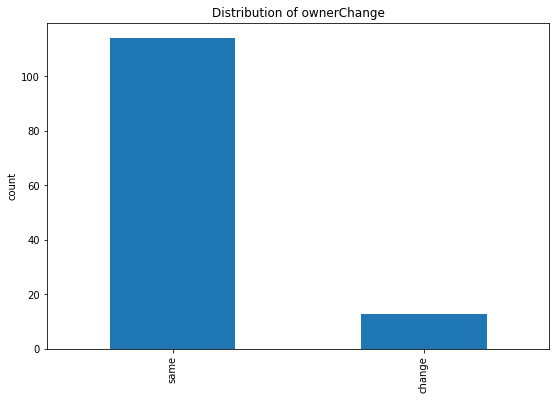

In [ ]:
print(test['ownerChange'].value_counts())

test['ownerChange'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of ownerChange')
plt.show()

#결측치가 잘 보간됨 

**4) 'employee1,2' 결측치 보간**

In [ ]:
test[test['employee1'] == '1,637']  #employee1,2 변수들에서 ,가 존재하는 값을 확인 

,OC,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
12,NaN,daejeon,19820630.000,363.000,general_hospital,181000000000.000,49235683539.000,127000000000.000,82395611833.000,3057687703.000,...,86305579205.000,35265508986.000,0.000,51040070219.000,25000000000.000,35348360663.000,0.000,"1,637","1,547",same


In [ ]:
#employee1,2에서 ','제거 후 실수형 척도로 변경
test.employee1 = test.employee1.astype('str').str.replace(",", "").astype('float')
test.employee2 = test.employee2.astype('str').str.replace(",", "").astype('float')

In [ ]:
#employee1 결측지를 instkind별 평균으로 대체
print(test.groupby('instkind')['employee1'].mean())
test['employee1'] = test['employee1'].fillna(test.groupby('instkind')['employee1'].transform('mean'))

print('-'*50)

test['employee1'].isnull().sum() #결측치를 보간했기에 isnull.sum=0

instkind
clinic                 215.000
general_hospital       617.556
hospital               148.094
nursing_hospital       102.694
traditional_clinic     546.000
traditional_hospital   132.000
Name: employee1, dtype: float64
--------------------------------------------------


0

In [ ]:
#employee2 결측지를 instkind별 평균으로 대체
print(test.groupby('instkind')['employee2'].mean())
test['employee2'] = test['employee2'].fillna(train.groupby('instkind')['employee2'].transform('mean'))

print('-'*50)

test['employee2'].isnull().sum()  #결측치를 보간했기에 isnull.sum=0

instkind
clinic                 178.750
general_hospital       584.235
hospital               140.567
nursing_hospital        98.017
traditional_clinic     409.000
traditional_hospital   137.000
Name: employee2, dtype: float64
--------------------------------------------------


0

**5) 금융데이터(renvenue1~surplus2) 모두 동일 행에 결측치 있어 행 삭제**

In [ ]:
#나머지 결측치 8개는 동일한 행에 있어서 모두 제거

test[test['revenue1'].isnull()]  #총 8개의 행에서 금융데이터에 동일하게 결측치 존재함을 확인함 

,OC,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
15,NaN,busan,19950330.000,226.000,general_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566.000,566.000,same
56,NaN,jeonbuk,20121218.000,539.000,nursing_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.000,200.000,same


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OC                  0 non-null      float64
 1   sido                127 non-null    object 
 2   openDate            126 non-null    float64
 3   bedCount            127 non-null    float64
 4   instkind            127 non-null    object 
 5   revenue1            125 non-null    float64
 6   salescost1          125 non-null    float64
 7   sga1                125 non-null    float64
 8   salary1             125 non-null    float64
 9   noi1                125 non-null    float64
 10  noe1                125 non-null    float64
 11  interest1           125 non-null    float64
 12  ctax1               125 non-null    float64
 13  profit1             125 non-null    float64
 14  liquidAsset1        125 non-null    float64
 15  quickAsset1         125 non-null    float64
 16  receivab

In [ ]:
#'OC'값이 모두 결측치이기 때문에 'revenue1' 변수를 기준으로 결측치 없애줌 

test = test.dropna(subset=['revenue1'])  #revenue1값이 결측치인 행 다 제거 ---> 2행만 결과적으로 제거됨 
test['revenue1'].isnull().sum()

#결측치 존재하는 행 삭제 및 보간으로 모든 변수에 결측치 없이 전처리 완료함. 
#isnull().sum() 함수를 통해서 모든 변수에서 결측치가 0으로 즉 존재하지 않음을 확인함. 

0

**6) openDate 척도 변경 및 년도 부분만 추출하고 결측치 제거**

In [ ]:
test['openDate']=test['openDate'].replace(np.NaN, 99999999)  #결측치 값을 99999999(YYYYMMDD)로 변경 

In [ ]:
## 'opendate' 척도 변경 및 년도 부분만 추출 ##
test['openDate']=test['openDate'].apply(lambda x: int(str(x)[:4])) 
test.rename(columns={'openDate': 'openYear'}, inplace=True) 

In [ ]:
# openYear 이상치(9999)를 최다빈수 값으로 채우기

print(test['openYear'].value_counts())
test['openYear'] = test['openYear'].fillna(int('2008'))  #최다빈수가 '2008'

print('-'*50)
test['openYear'].isnull().sum()  
#결측치를 보간했기 때문에 isnull.sum()=0으로 나옴 

2008    11
2007     9
2006     8
2013     8
2010     7
2011     7
2012     7
2015     6
1988     6
2005     6
2016     5
1999     4
1996     4
2009     4
2001     4
2000     4
1997     3
2014     3
2003     2
1994     2
1982     2
2017     2
1993     2
1989     1
9999     1
1995     1
2002     1
1983     1
2004     1
1985     1
1976     1
1998     1
Name: openYear, dtype: int64
--------------------------------------------------


0

**일부 독립변수 척도 변경**

In [ ]:
# 종속변수 'OC'를 제외한, 척도가 object인 'sido' , 'instkind' 'ownerChage' 변수 LabelEncoder 실행하기 --> object 데이터를 수치형으로 변환
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
test['sido'] = test.loc[:,['sido']].apply(lambda x : LE.fit_transform(x))
test['instkind'] = test.loc[:,['instkind']].apply(lambda x : LE.fit_transform(x))
test['ownerChange'] = test.loc[:,['ownerChange']].apply(lambda x : LE.fit_transform(x))

display(test)      

,OC,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,NaN,8,1998,300.000,1,66824864410.000,0.000,65657092101.000,32236953402.000,4314093449.000,...,55406431667.000,50684431667.000,37143344381.000,4720000000.000,4690000000.000,16085395374.000,8944587276.000,693.000,693.000,1
1,NaN,9,2016,44.000,2,34957575568.000,0.000,32592697196.000,16722544253.000,68710235.000,...,67308375170.000,42098280733.000,24200000000.000,25210094437.000,18300000000.000,3789134965.000,0.000,379.000,371.000,1
2,NaN,11,1989,276.000,1,23260305967.000,2542570943.000,23087485220.000,11687337552.000,1601942757.000,...,0.000,27775892339.000,21822782890.000,0.000,0.000,0.000,16385400958.000,617.556,92.442,1
3,NaN,0,2010,363.000,1,0.000,0.000,0.000,0.000,4850652289.000,...,12115167523.000,9556237015.000,4251867179.000,2558930508.000,0.000,39142835592.000,0.000,760.000,760.000,1
4,NaN,10,2004,213.000,1,50370249897.000,0.000,48558027276.000,22963463015.000,1534452040.000,...,43959732611.000,7535567468.000,3298427375.000,36424165143.000,21347120000.000,25744878066.000,15072685841.000,437.000,385.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NaN,11,2001,0.000,4,22330305917.000,848465677.000,18492554091.000,12322408350.000,423628901.000,...,15632174080.000,12881803375.000,0.000,2750370705.000,0.000,13849584833.000,0.000,560.000,116.012,1
123,NaN,6,2001,-999.000,5,18339061749.000,0.000,17601165049.000,6824241310.000,31454472.000,...,3176627772.000,1376741520.000,0.000,1799886252.000,1740000000.000,8574502448.000,7136681406.000,132.000,137.000,1
124,NaN,6,2001,150.000,2,14242664951.000,1726174241.000,11487224105.000,6279155191.000,27234504.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,148.094,92.442,1
125,NaN,9,2001,187.984,3,48927096685.000,41571482611.000,4721485293.000,1514547079.000,85098148.000,...,37203968971.000,8485918077.000,0.000,28718050894.000,25631200000.000,-205062936.000,0.000,363.000,343.000,1


## **RF로 test의 개폐업 예측**

In [ ]:
#train데이터를 이용해서 만든 최적의 모델, 랜덤포레스트 모델로 test데이터의 종속변수(개폐업) 예측 
forest = RandomForestClassifier(n_estimators=13, random_state=0) 
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=13, random_state=0)

In [ ]:
test2=test.drop(['OC'], axis=1) #test데이터에서 결측치를 갖고 있는 종속변수('OC')제거 후 test2에 할당 

In [ ]:
test2

,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,8,1998,300.000,1,66824864410.000,0.000,65657092101.000,32236953402.000,4314093449.000,4901516562.000,...,55406431667.000,50684431667.000,37143344381.000,4720000000.000,4690000000.000,16085395374.000,8944587276.000,693.000,693.000,1
1,9,2016,44.000,2,34957575568.000,0.000,32592697196.000,16722544253.000,68710235.000,1981032861.000,...,67308375170.000,42098280733.000,24200000000.000,25210094437.000,18300000000.000,3789134965.000,0.000,379.000,371.000,1
2,11,1989,276.000,1,23260305967.000,2542570943.000,23087485220.000,11687337552.000,1601942757.000,1380941439.000,...,0.000,27775892339.000,21822782890.000,0.000,0.000,0.000,16385400958.000,617.556,92.442,1
3,0,2010,363.000,1,0.000,0.000,0.000,0.000,4850652289.000,2060988817.000,...,12115167523.000,9556237015.000,4251867179.000,2558930508.000,0.000,39142835592.000,0.000,760.000,760.000,1
4,10,2004,213.000,1,50370249897.000,0.000,48558027276.000,22963463015.000,1534452040.000,0.000,...,43959732611.000,7535567468.000,3298427375.000,36424165143.000,21347120000.000,25744878066.000,15072685841.000,437.000,385.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,11,2001,0.000,4,22330305917.000,848465677.000,18492554091.000,12322408350.000,423628901.000,1304816893.000,...,15632174080.000,12881803375.000,0.000,2750370705.000,0.000,13849584833.000,0.000,560.000,116.012,1
123,6,2001,-999.000,5,18339061749.000,0.000,17601165049.000,6824241310.000,31454472.000,21226325.000,...,3176627772.000,1376741520.000,0.000,1799886252.000,1740000000.000,8574502448.000,7136681406.000,132.000,137.000,1
124,6,2001,150.000,2,14242664951.000,1726174241.000,11487224105.000,6279155191.000,27234504.000,860727881.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,148.094,92.442,1
125,9,2001,187.984,3,48927096685.000,41571482611.000,4721485293.000,1514547079.000,85098148.000,1270081418.000,...,37203968971.000,8485918077.000,0.000,28718050894.000,25631200000.000,-205062936.000,0.000,363.000,343.000,1


In [ ]:
pred_train=forest.predict(test2)
pred_train
#test데이터의 종속변수 예측값

array(['open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', ' close', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
    

In [ ]:
pred_train=pd.DataFrame(pred_train)
pred_train

,0
0,open
1,open
2,open
3,open
4,open
...,...
120,open
121,open
122,open
123,open


In [ ]:
test

,OC,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,NaN,8,1998,300.000,1,66824864410.000,0.000,65657092101.000,32236953402.000,4314093449.000,...,55406431667.000,50684431667.000,37143344381.000,4720000000.000,4690000000.000,16085395374.000,8944587276.000,693.000,693.000,1
1,NaN,9,2016,44.000,2,34957575568.000,0.000,32592697196.000,16722544253.000,68710235.000,...,67308375170.000,42098280733.000,24200000000.000,25210094437.000,18300000000.000,3789134965.000,0.000,379.000,371.000,1
2,NaN,11,1989,276.000,1,23260305967.000,2542570943.000,23087485220.000,11687337552.000,1601942757.000,...,0.000,27775892339.000,21822782890.000,0.000,0.000,0.000,16385400958.000,617.556,92.442,1
3,NaN,0,2010,363.000,1,0.000,0.000,0.000,0.000,4850652289.000,...,12115167523.000,9556237015.000,4251867179.000,2558930508.000,0.000,39142835592.000,0.000,760.000,760.000,1
4,NaN,10,2004,213.000,1,50370249897.000,0.000,48558027276.000,22963463015.000,1534452040.000,...,43959732611.000,7535567468.000,3298427375.000,36424165143.000,21347120000.000,25744878066.000,15072685841.000,437.000,385.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NaN,11,2001,0.000,4,22330305917.000,848465677.000,18492554091.000,12322408350.000,423628901.000,...,15632174080.000,12881803375.000,0.000,2750370705.000,0.000,13849584833.000,0.000,560.000,116.012,1
123,NaN,6,2001,-999.000,5,18339061749.000,0.000,17601165049.000,6824241310.000,31454472.000,...,3176627772.000,1376741520.000,0.000,1799886252.000,1740000000.000,8574502448.000,7136681406.000,132.000,137.000,1
124,NaN,6,2001,150.000,2,14242664951.000,1726174241.000,11487224105.000,6279155191.000,27234504.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,148.094,92.442,1
125,NaN,9,2001,187.984,3,48927096685.000,41571482611.000,4721485293.000,1514547079.000,85098148.000,...,37203968971.000,8485918077.000,0.000,28718050894.000,25631200000.000,-205062936.000,0.000,363.000,343.000,1


In [ ]:
result=pd.concat([pred_train, test2], axis=1) #예측값과 test데이터를 합친 결과 데이터프레임

open      124
 close      1
Name: 0, dtype: int64


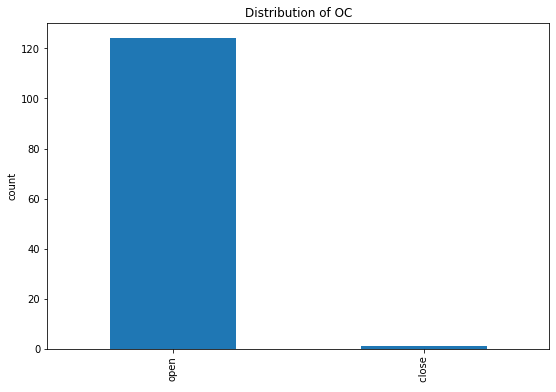

In [ ]:
#test데이터의 종속변수 예측값들의 분포를 시각화로 나타냄 

print(result[0].value_counts())

result[0].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of OC')
plt.show()

# 위에서 선정한 랜덤포레스트 모델로 test 데이터로 종속변수를 예측한 결과는 open 124 & close 1개임.

# **파생변수 추가**

* **유동비율(%):** 유동자산/유동부채* 100 
* **당좌비율(%):**  당좌자산 / 유동부채 * 100
* **부채비율(%):** 부채(부채총계) / 자기자본(순자산총계) * 100
* **고정비율(%):**  고정자산(비유동자산) / 자기자본(순자산총계) * 100
* **총자산:**  순자산총계 + 부채총계
* **총자산회전율(회):** 매출액 / 총자산
* **ROI(%):** 순이익(당기순이익) / 총자산 * 100
* **ROE(%):** 순이익(당기순이익) / 자기자본(순자산총계) * 100
* **ROS(%):** 순이익(당기순이익) / 매출액 * 100
* **총자산증가율(%):** (당기총자산-전기총자산) / 전기총자산 * 100-100
* **매출액증가율(%):** (당기매출액-전기매출액) / 전기매출액 * 100
* **순이익증가율(%):** (당기순이익-전기순이익) / 전기순이익 * 100


In [ ]:
train

,OC,sido,openYear,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,open,2,2007,175.000,4,4217530010.000,0.000,3961134739.000,2033835290.000,15652441.000,...,758993742.000,222876855.000,0.000,536116887.000,390000000.000,2619290493.000,1271224493.000,62.000,64.000,1
2,open,8,2016,468.000,4,1004521989.000,515483669.000,447219722.000,296402310.000,76156.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,1.000,1
3,open,10,2000,353.000,2,72507342181.000,0.000,70677397660.000,31786048663.000,506223059.000,...,37755010512.000,17018596586.000,9219427379.000,20736413926.000,15100000000.000,12954271998.000,7740829037.000,663.000,663.000,1
4,open,9,2005,196.000,2,49043538016.000,0.000,47656051197.000,24460782270.000,112352259.000,...,51432592890.000,30072585842.000,17593752360.000,21360007048.000,14108027465.000,5561941.000,9025549604.000,206.000,197.000,1
5,open,9,2002,243.000,2,33580536703.000,9222996930.000,23727912054.000,16655333342.000,65414325.000,...,0.000,21861133888.000,17087136895.000,20000000.000,0.000,0.000,5879003604.000,397.000,390.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,open,12,2005,214.000,4,7614696536.000,415347464.000,5903119133.000,3467861240.000,42098974.000,...,9423771130.000,2618201328.000,0.000,6805569802.000,5930000000.000,5379501732.000,811641602.000,193.000,141.000,1
297,close,2,2014,96.221,3,6717143911.000,8200000000.000,0.000,0.000,186359.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,79.000,79.000,1
298,close,7,1983,96.221,3,0.000,0.000,54794278.000,7500000.000,121022160.000,...,6370097200.000,2170972735.000,0.000,4199124465.000,2498749346.000,3259161079.000,0.000,125.488,116.012,0
299,close,8,2007,180.000,4,2116892231.000,268174808.000,3286244912.000,2231944446.000,123665065.000,...,639233573.000,6400000000.000,0.000,0.000,0.000,0.000,0.000,100.000,93.186,1


**파생변수를 만들기 위해 필요한 일부 변수들만 추출해서 train2에 할당**

In [ ]:
train2=train[['liquidAsset1', 'liquidAsset2', 'liquidLiabilities1', 'liquidLiabilities2', 'quickAsset1', 'quickAsset2', 'debt1', 'debt2', 'netAsset1','netAsset2', 'nonCAsset1', 'nonCAsset2', 'revenue1', 'revenue2',  'profit1', 'profit2']]

In [ ]:
train2

,liquidAsset1,liquidAsset2,liquidLiabilities1,liquidLiabilities2,quickAsset1,quickAsset2,debt1,debt2,netAsset1,netAsset2,nonCAsset1,nonCAsset2,revenue1,revenue2,profit1,profit2
0,1012699685.000,830169459.000,201323700.000,222876855.000,997671878.000,816570489.000,682825991.000,758993742.000,2844460171.000,2619290493.000,2514586477.000,2548114776.000,4217530010.000,4297848250.000,225169678.000,207829685.000
2,272442138.000,0.000,92414342.000,0.000,253682170.000,0.000,92414342.000,0.000,300508824.000,0.000,120481028.000,0.000,1004521989.000,0.000,41864754.000,0.000
3,13041543085.000,11125720580.000,27991880794.000,17018596586.000,11534749645.000,9890539620.000,42363797762.000,37755010512.000,13857102286.000,12954271998.000,43179356963.000,39583561930.000,72507342181.000,66858336474.000,902830288.000,838387466.000
4,6317084032.000,4906776494.000,28909188091.000,30072585842.000,5873265455.000,4464017363.000,49898105519.000,51432592890.000,86311637.000,5561941.000,43667333124.000,46531378337.000,49043538016.000,48082801047.000,80749696.000,32642585.000
5,5635104883.000,4869419176.000,18499383217.000,21861133888.000,5481680248.000,4725857392.000,0.000,0.000,0.000,0.000,18649703167.000,22127146425.000,33580536703.000,34334446461.000,-46227375.000,74685954.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2776602883.000,2550561757.000,1520003728.000,2618201328.000,2769516492.000,2542336059.000,8715369364.000,9423771130.000,5973888543.000,5379501732.000,11912655024.000,12252711105.000,7614696536.000,7068815899.000,594386811.000,-262415085.000
297,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6717143911.000,0.000,-1622521056.000,0.000
298,3867238248.000,4074622358.000,2050341703.000,2170972735.000,3867238248.000,4069797048.000,6249466168.000,6370097200.000,3187408001.000,3259161079.000,5569635921.000,5554635921.000,0.000,3132197950.000,-71753078.000,-151827207.000
299,4929369598.000,5896047068.000,7507060418.000,6400000000.000,4910840268.000,5840525701.000,580426781.000,639233573.000,0.000,0.000,11966238035.000,11976327035.000,2116892231.000,4096871954.000,-1850554348.000,-2729675155.000


**유동비율(%): 유동자산/유동부채*100**  
**유동비율: currentRatio, 유동자산: liquidAsset, 유동부채: liquidLiabilities**


In [ ]:
#2017년 
train2['currentRatio1']=train2['liquidAsset1']/train2['liquidLiabilities1']*100
train2[['currentRatio1', 'liquidAsset1', 'liquidLiabilities1']]

<ipython-input-298-1f9b92107af5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['currentRatio1']=train2['liquidAsset1']/train2['liquidLiabilities1']*100


,currentRatio1,liquidAsset1,liquidLiabilities1
0,503.021,1012699685.000,201323700.000
2,294.805,272442138.000,92414342.000
3,46.590,13041543085.000,27991880794.000
4,21.851,6317084032.000,28909188091.000
5,30.461,5635104883.000,18499383217.000
...,...,...,...
296,182.671,2776602883.000,1520003728.000
297,NaN,0.000,0.000
298,188.614,3867238248.000,2050341703.000
299,65.663,4929369598.000,7507060418.000


In [ ]:
#2016년
train2['currentRatio2']=train2['liquidAsset2']/train2['liquidLiabilities2']*100
train2[['currentRatio2', 'liquidAsset2', 'liquidLiabilities2']]

<ipython-input-299-175f500c1b55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['currentRatio2']=train2['liquidAsset2']/train2['liquidLiabilities2']*100


,currentRatio2,liquidAsset2,liquidLiabilities2
0,372.479,830169459.000,222876855.000
2,NaN,0.000,0.000
3,65.374,11125720580.000,17018596586.000
4,16.316,4906776494.000,30072585842.000
5,22.274,4869419176.000,21861133888.000
...,...,...,...
296,97.417,2550561757.000,2618201328.000
297,NaN,0.000,0.000
298,187.686,4074622358.000,2170972735.000
299,92.126,5896047068.000,6400000000.000


**당좌비율(%) = 당좌자산 / 유동부채 * 100**  
**당좌비율: quickRatio, 당좌자산: uickAsset, 유동부채: liquidLiabilities**

In [ ]:
#2017년 
train2['quickRatio1']=train2['quickAsset1']/train2['liquidLiabilities1']*100
train2[['quickRatio1', 'quickAsset1', 'liquidLiabilities1']]

<ipython-input-300-f925b60b7c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['quickRatio1']=train2['quickAsset1']/train2['liquidLiabilities1']*100


,quickRatio1,quickAsset1,liquidLiabilities1
0,495.556,997671878.000,201323700.000
2,274.505,253682170.000,92414342.000
3,41.207,11534749645.000,27991880794.000
4,20.316,5873265455.000,28909188091.000
5,29.632,5481680248.000,18499383217.000
...,...,...,...
296,182.205,2769516492.000,1520003728.000
297,NaN,0.000,0.000
298,188.614,3867238248.000,2050341703.000
299,65.416,4910840268.000,7507060418.000


In [ ]:
#2016년 
train2['quickRatio2']=train2['quickAsset2']/train2['liquidLiabilities2']*100
train2[['quickRatio2', 'quickAsset2', 'liquidLiabilities2']]

<ipython-input-301-263900ff4cd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['quickRatio2']=train2['quickAsset2']/train2['liquidLiabilities2']*100


,quickRatio2,quickAsset2,liquidLiabilities2
0,366.377,816570489.000,222876855.000
2,NaN,0.000,0.000
3,58.116,9890539620.000,17018596586.000
4,14.844,4464017363.000,30072585842.000
5,21.618,4725857392.000,21861133888.000
...,...,...,...
296,97.102,2542336059.000,2618201328.000
297,NaN,0.000,0.000
298,187.464,4069797048.000,2170972735.000
299,91.258,5840525701.000,6400000000.000


**부채비율(%) = 부채(부채총계) / 자기자본(순자산총계) * 100**  
**부채비율: debtRatio1, 부채총계: debt, 순자산총계: netAsset**

In [ ]:
#2017년 
train2['debtRatio1']=train2['debt1']/train2['netAsset1']*100
train2[['debtRatio1', 'debt1', 'netAsset1']]

<ipython-input-302-5d10de1f8467>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['debtRatio1']=train2['debt1']/train2['netAsset1']*100


,debtRatio1,debt1,netAsset1
0,24.005,682825991.000,2844460171.000
2,30.753,92414342.000,300508824.000
3,305.719,42363797762.000,13857102286.000
4,57811.562,49898105519.000,86311637.000
5,NaN,0.000,0.000
...,...,...,...
296,145.891,8715369364.000,5973888543.000
297,NaN,0.000,0.000
298,196.067,6249466168.000,3187408001.000
299,inf,580426781.000,0.000


In [ ]:
#2016년 
train2['debtRatio2']=train2['debt2']/train2['netAsset2']*100
train2[['debtRatio2', 'debt2', 'netAsset2']]

<ipython-input-303-939c4765ee8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['debtRatio2']=train2['debt2']/train2['netAsset2']*100


,debtRatio2,debt2,netAsset2
0,28.977,758993742.000,2619290493.000
2,NaN,0.000,0.000
3,291.448,37755010512.000,12954271998.000
4,924723.813,51432592890.000,5561941.000
5,NaN,0.000,0.000
...,...,...,...
296,175.179,9423771130.000,5379501732.000
297,NaN,0.000,0.000
298,195.452,6370097200.000,3259161079.000
299,inf,639233573.000,0.000


**고정비율(%) = 고정자산(비유동자산) / 자기자본(순자산총계) * 100**  
**고정비율: fixedRate, 유동자산: nonCAsset, 순자산총계: netAsset**

In [ ]:
#2017년 
train2['fixedRatio1']=train2['nonCAsset1']/train2['netAsset1']*100
train2[['fixedRatio1', 'nonCAsset1', 'netAsset1']]

<ipython-input-304-1ac283b14c0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['fixedRatio1']=train2['nonCAsset1']/train2['netAsset1']*100


,fixedRatio1,nonCAsset1,netAsset1
0,88.403,2514586477.000,2844460171.000
2,40.092,120481028.000,300508824.000
3,311.605,43179356963.000,13857102286.000
4,50592.637,43667333124.000,86311637.000
5,inf,18649703167.000,0.000
...,...,...,...
296,199.412,11912655024.000,5973888543.000
297,NaN,0.000,0.000
298,174.739,5569635921.000,3187408001.000
299,inf,11966238035.000,0.000


In [ ]:
#2016년 
train2['fixedRatio2']=train2['nonCAsset2']/train2['netAsset2']*100
train2[['fixedRatio2', 'nonCAsset2', 'netAsset2']]

<ipython-input-305-6da7787a71d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['fixedRatio2']=train2['nonCAsset2']/train2['netAsset2']*100


,fixedRatio2,nonCAsset2,netAsset2
0,97.283,2548114776.000,2619290493.000
2,NaN,0.000,0.000
3,305.564,39583561930.000,12954271998.000
4,836603.235,46531378337.000,5561941.000
5,inf,22127146425.000,0.000
...,...,...,...
296,227.767,12252711105.000,5379501732.000
297,NaN,0.000,0.000
298,170.431,5554635921.000,3259161079.000
299,inf,11976327035.000,0.000


**총자산=순자산총계+부채총계**  
**총자산: totalAsset, 순자산총계: netAsset, 부채총계: debt**




In [ ]:
#2017년 
train2['totalAsset1']=train2['netAsset1']+train2['debt1']
train2[['totalAsset1', 'netAsset1', 'debt1']]

<ipython-input-306-cae32fc457f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['totalAsset1']=train2['netAsset1']+train2['debt1']


,totalAsset1,netAsset1,debt1
0,3527286162.000,2844460171.000,682825991.000
2,392923166.000,300508824.000,92414342.000
3,56220900048.000,13857102286.000,42363797762.000
4,49984417156.000,86311637.000,49898105519.000
5,0.000,0.000,0.000
...,...,...,...
296,14689257907.000,5973888543.000,8715369364.000
297,0.000,0.000,0.000
298,9436874169.000,3187408001.000,6249466168.000
299,580426781.000,0.000,580426781.000


In [ ]:
#2016년 
train2['totalAsset2']=train2['netAsset2']+train2['debt2']
train2[['totalAsset2', 'netAsset2', 'debt2']]

<ipython-input-307-b225d332a467>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['totalAsset2']=train2['netAsset2']+train2['debt2']


,totalAsset2,netAsset2,debt2
0,3378284235.000,2619290493.000,758993742.000
2,0.000,0.000,0.000
3,50709282510.000,12954271998.000,37755010512.000
4,51438154831.000,5561941.000,51432592890.000
5,0.000,0.000,0.000
...,...,...,...
296,14803272862.000,5379501732.000,9423771130.000
297,0.000,0.000,0.000
298,9629258279.000,3259161079.000,6370097200.000
299,639233573.000,0.000,639233573.000


**총자산회전율(회) = 매출액 / 총자산**  
**총자산회전율: totalAssetTurnover, 매출액: revenue, 총자산: totalAsset**


In [ ]:
#2017년 
train2['totalAssetTurnover1']=train2['revenue1']/train2['totalAsset1']
train2[['totalAssetTurnover1', 'revenue1', 'totalAsset1']]

<ipython-input-308-bbfc2d60d2bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['totalAssetTurnover1']=train2['revenue1']/train2['totalAsset1']


,totalAssetTurnover1,revenue1,totalAsset1
0,1.196,4217530010.000,3527286162.000
2,2.557,1004521989.000,392923166.000
3,1.290,72507342181.000,56220900048.000
4,0.981,49043538016.000,49984417156.000
5,inf,33580536703.000,0.000
...,...,...,...
296,0.518,7614696536.000,14689257907.000
297,inf,6717143911.000,0.000
298,0.000,0.000,9436874169.000
299,3.647,2116892231.000,580426781.000


In [ ]:
#2016년 
train2['totalAssetTurnover2']=train2['revenue2']/train2['totalAsset2']
train2[['totalAssetTurnover2', 'revenue2', 'totalAsset2']]

<ipython-input-309-a151ee3b41d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['totalAssetTurnover2']=train2['revenue2']/train2['totalAsset2']


,totalAssetTurnover2,revenue2,totalAsset2
0,1.272,4297848250.000,3378284235.000
2,NaN,0.000,0.000
3,1.318,66858336474.000,50709282510.000
4,0.935,48082801047.000,51438154831.000
5,inf,34334446461.000,0.000
...,...,...,...
296,0.478,7068815899.000,14803272862.000
297,NaN,0.000,0.000
298,0.325,3132197950.000,9629258279.000
299,6.409,4096871954.000,639233573.000


**총자산수익률(ROI: Return on Investment)(%) = 순이익(당기순이익) / 총자산 * 100**  
**당기순이익: profit, 총자산: totalAsset**

In [ ]:
#2017년 
train2['ROI1']=train2['profit1']/train2['totalAsset1']*100
train2[['ROI1', 'profit1', 'totalAsset1']]

<ipython-input-310-cb830d44b31a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['ROI1']=train2['profit1']/train2['totalAsset1']*100


,ROI1,profit1,totalAsset1
0,6.384,225169678.000,3527286162.000
2,10.655,41864754.000,392923166.000
3,1.606,902830288.000,56220900048.000
4,0.162,80749696.000,49984417156.000
5,-inf,-46227375.000,0.000
...,...,...,...
296,4.046,594386811.000,14689257907.000
297,-inf,-1622521056.000,0.000
298,-0.760,-71753078.000,9436874169.000
299,-318.826,-1850554348.000,580426781.000


In [ ]:
#2016년 
train2['ROI2']=train2['profit2']/train2['totalAsset2']*100
train2[['ROI2', 'profit2', 'totalAsset2']]

<ipython-input-311-3720cb5702ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['ROI2']=train2['profit2']/train2['totalAsset2']*100


,ROI2,profit2,totalAsset2
0,6.152,207829685.000,3378284235.000
2,NaN,0.000,0.000
3,1.653,838387466.000,50709282510.000
4,0.063,32642585.000,51438154831.000
5,inf,74685954.000,0.000
...,...,...,...
296,-1.773,-262415085.000,14803272862.000
297,NaN,0.000,0.000
298,-1.577,-151827207.000,9629258279.000
299,-427.023,-2729675155.000,639233573.000


**자기자본순이익률(ROE : Return on Equity)(%)= 순이익(당기순이익) / 자기자본(순자산총계) * 100**  
**당기순이익: profit, 순자산총계: netAsset**

In [ ]:
#2017년 
train2['ROE1']=train2['profit1']/train2['netAsset1']*100
train2[['ROE1', 'profit1', 'netAsset1']]

<ipython-input-312-5771a6c83a94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['ROE1']=train2['profit1']/train2['netAsset1']*100


,ROE1,profit1,netAsset1
0,7.916,225169678.000,2844460171.000
2,13.931,41864754.000,300508824.000
3,6.515,902830288.000,13857102286.000
4,93.556,80749696.000,86311637.000
5,-inf,-46227375.000,0.000
...,...,...,...
296,9.950,594386811.000,5973888543.000
297,-inf,-1622521056.000,0.000
298,-2.251,-71753078.000,3187408001.000
299,-inf,-1850554348.000,0.000


In [ ]:
#2016년 
train2['ROE2']=train2['profit2']/train2['netAsset2']*100
train2[['ROE2', 'profit2', 'netAsset2']]

<ipython-input-313-74086e18064e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['ROE2']=train2['profit2']/train2['netAsset2']*100


,ROE2,profit2,netAsset2
0,7.935,207829685.000,2619290493.000
2,NaN,0.000,0.000
3,6.472,838387466.000,12954271998.000
4,586.892,32642585.000,5561941.000
5,inf,74685954.000,0.000
...,...,...,...
296,-4.878,-262415085.000,5379501732.000
297,NaN,0.000,0.000
298,-4.658,-151827207.000,3259161079.000
299,-inf,-2729675155.000,0.000


**매출액순이익률(ROS : Return on Sales)(%) = 순이익(당기순이익) / 매출액 * 100**  
**당기순이익: profit, 매출액: revenue**

In [ ]:
#2017년 
train2['ROS1']=train2['profit1']/train['revenue1']*100
train2[['ROS1', 'profit1', 'revenue1']]

<ipython-input-314-13054f6c05dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['ROS1']=train2['profit1']/train['revenue1']*100


,ROS1,profit1,revenue1
0,5.339,225169678.000,4217530010.000
2,4.168,41864754.000,1004521989.000
3,1.245,902830288.000,72507342181.000
4,0.165,80749696.000,49043538016.000
5,-0.138,-46227375.000,33580536703.000
...,...,...,...
296,7.806,594386811.000,7614696536.000
297,-24.155,-1622521056.000,6717143911.000
298,-inf,-71753078.000,0.000
299,-87.418,-1850554348.000,2116892231.000


In [ ]:
#2016년 
train2['ROS2']=train2['profit2']/train2['revenue2']*100
train2[['ROS2', 'profit2', 'revenue2']]

<ipython-input-315-4cc4cf883620>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['ROS2']=train2['profit2']/train2['revenue2']*100


,ROS2,profit2,revenue2
0,4.836,207829685.000,4297848250.000
2,NaN,0.000,0.000
3,1.254,838387466.000,66858336474.000
4,0.068,32642585.000,48082801047.000
5,0.218,74685954.000,34334446461.000
...,...,...,...
296,-3.712,-262415085.000,7068815899.000
297,NaN,0.000,0.000
298,-4.847,-151827207.000,3132197950.000
299,-66.628,-2729675155.000,4096871954.000


**총자산증가율(%) = (당기총자산-전기총자산)/전기총자산 * 100-100**  
**총자산증가율: totalAssetGR, 당기총자산: totalAsset1, 전기총자산: totalAsset2**

In [ ]:
train2['totalAssetGR']=(train2['totalAsset1']-train2['totalAsset2'])/train2['totalAsset2']*100-100
train2[['totalAssetGR', 'totalAsset1', 'totalAsset2']]

<ipython-input-316-5d235a932e50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['totalAssetGR']=(train2['totalAsset1']-train2['totalAsset2'])/train2['totalAsset2']*100-100


,totalAssetGR,totalAsset1,totalAsset2
0,-95.589,3527286162.000,3378284235.000
2,inf,392923166.000,0.000
3,-89.131,56220900048.000,50709282510.000
4,-102.826,49984417156.000,51438154831.000
5,NaN,0.000,0.000
...,...,...,...
296,-100.770,14689257907.000,14803272862.000
297,NaN,0.000,0.000
298,-101.998,9436874169.000,9629258279.000
299,-109.200,580426781.000,639233573.000


**매출액증가율(%) = (당기매출액-전기매출액) / 전기매출액 * 100**   
**매출액증가율: salesgrowthRate, 당기매출액: 17년 매출액(revenue1), 전기매출액: 16년 매출액(revenue2)**

In [ ]:
train2['salesgrowthRate']=(train2['revenue1']-train2['revenue2'])/train2['revenue2']*100
train2[['salesgrowthRate', 'revenue1', 'revenue2']]

<ipython-input-317-2fad4094de5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['salesgrowthRate']=(train2['revenue1']-train2['revenue2'])/train2['revenue2']*100


,salesgrowthRate,revenue1,revenue2
0,-1.869,4217530010.000,4297848250.000
2,inf,1004521989.000,0.000
3,8.449,72507342181.000,66858336474.000
4,1.998,49043538016.000,48082801047.000
5,-2.196,33580536703.000,34334446461.000
...,...,...,...
296,7.722,7614696536.000,7068815899.000
297,inf,6717143911.000,0.000
298,-100.000,0.000,3132197950.000
299,-48.329,2116892231.000,4096871954.000


**순이익증가율(%) = (당기순이익-전기순수익) / 전기순수익* 100**  
**순수익증가율: netprofitGR, 당기순수익: 17년 순수익(profit1), 전기순수익: 16년 순수익(profit2)**

In [ ]:
min(train2['profit2'])  #전기순수익의 최소값이 음수 형태이기 때문에 파생변수 순수익증가율의 결과값이 음수가 됨을 방지하게 위해서 절댓값을 취해주는 과정이 필요함 

-4064822885.0

In [ ]:
train2['netprofitGR']=(train2['profit1']-train2['profit2'])/abs(train2['profit2'])*100
train2[['netprofitGR', 'profit1', 'profit2']]

<ipython-input-319-46301eb878b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['netprofitGR']=(train2['profit1']-train2['profit2'])/abs(train2['profit2'])*100


,netprofitGR,profit1,profit2
0,8.343,225169678.000,207829685.000
2,inf,41864754.000,0.000
3,7.687,902830288.000,838387466.000
4,147.375,80749696.000,32642585.000
5,-161.896,-46227375.000,74685954.000
...,...,...,...
296,326.506,594386811.000,-262415085.000
297,-inf,-1622521056.000,0.000
298,52.740,-71753078.000,-151827207.000
299,32.206,-1850554348.000,-2729675155.000


In [ ]:
train2

,liquidAsset1,liquidAsset2,liquidLiabilities1,liquidLiabilities2,quickAsset1,quickAsset2,debt1,debt2,netAsset1,netAsset2,...,totalAssetTurnover2,ROI1,ROI2,ROE1,ROE2,ROS1,ROS2,totalAssetGR,salesgrowthRate,netprofitGR
0,1012699685.000,830169459.000,201323700.000,222876855.000,997671878.000,816570489.000,682825991.000,758993742.000,2844460171.000,2619290493.000,...,1.272,6.384,6.152,7.916,7.935,5.339,4.836,-95.589,-1.869,8.343
2,272442138.000,0.000,92414342.000,0.000,253682170.000,0.000,92414342.000,0.000,300508824.000,0.000,...,NaN,10.655,NaN,13.931,NaN,4.168,NaN,inf,inf,inf
3,13041543085.000,11125720580.000,27991880794.000,17018596586.000,11534749645.000,9890539620.000,42363797762.000,37755010512.000,13857102286.000,12954271998.000,...,1.318,1.606,1.653,6.515,6.472,1.245,1.254,-89.131,8.449,7.687
4,6317084032.000,4906776494.000,28909188091.000,30072585842.000,5873265455.000,4464017363.000,49898105519.000,51432592890.000,86311637.000,5561941.000,...,0.935,0.162,0.063,93.556,586.892,0.165,0.068,-102.826,1.998,147.375
5,5635104883.000,4869419176.000,18499383217.000,21861133888.000,5481680248.000,4725857392.000,0.000,0.000,0.000,0.000,...,inf,-inf,inf,-inf,inf,-0.138,0.218,NaN,-2.196,-161.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2776602883.000,2550561757.000,1520003728.000,2618201328.000,2769516492.000,2542336059.000,8715369364.000,9423771130.000,5973888543.000,5379501732.000,...,0.478,4.046,-1.773,9.950,-4.878,7.806,-3.712,-100.770,7.722,326.506
297,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,-inf,NaN,-inf,NaN,-24.155,NaN,NaN,inf,-inf
298,3867238248.000,4074622358.000,2050341703.000,2170972735.000,3867238248.000,4069797048.000,6249466168.000,6370097200.000,3187408001.000,3259161079.000,...,0.325,-0.760,-1.577,-2.251,-4.658,-inf,-4.847,-101.998,-100.000,52.740
299,4929369598.000,5896047068.000,7507060418.000,6400000000.000,4910840268.000,5840525701.000,580426781.000,639233573.000,0.000,0.000,...,6.409,-318.826,-427.023,-inf,-inf,-87.418,-66.628,-109.200,-48.329,32.206


In [ ]:
train2=train2.replace(np.NaN, 0)  #결측치 값을 0으로 변경 ---> 0/0이 결측치(NaN)값으로 나오기 때문에 최종적으로 모든 결측치 값들을 0으로 다시 변경 

In [ ]:
train2.isnull().sum()  #결측치 값이 없음을 확인 

liquidAsset1           0
liquidAsset2           0
liquidLiabilities1     0
liquidLiabilities2     0
quickAsset1            0
quickAsset2            0
debt1                  0
debt2                  0
netAsset1              0
netAsset2              0
nonCAsset1             0
nonCAsset2             0
revenue1               0
revenue2               0
profit1                0
profit2                0
currentRatio1          0
currentRatio2          0
quickRatio1            0
quickRatio2            0
debtRatio1             0
debtRatio2             0
fixedRatio1            0
fixedRatio2            0
totalAsset1            0
totalAsset2            0
totalAssetTurnover1    0
totalAssetTurnover2    0
ROI1                   0
ROI2                   0
ROE1                   0
ROE2                   0
ROS1                   0
ROS2                   0
totalAssetGR           0
salesgrowthRate        0
netprofitGR            0
dtype: int64

In [ ]:
# inf 값 대체 
train2=train2.replace(np.inf, 999)
train2=train2.replace(-np.inf, -999)
train2

,OC,sido,openYear,bedCount,instkind,salescost1,sga1,salary1,noi1,noe1,...,totalAssetTurnover2,ROI1,ROI2,ROE1,ROE2,ROS1,ROS2,totalAssetGR,salesgrowthRate,netprofitGR
0,open,2,2007,175.000,4,0.000,3961134739.000,2033835290.000,15652441.000,15236236.000,...,1.272,6.384,6.152,7.916,7.935,5.339,4.836,-95.589,-1.869,8.343
2,open,8,2016,468.000,4,515483669.000,447219722.000,296402310.000,76156.000,30000.000,...,0.000,10.655,0.000,13.931,0.000,4.168,0.000,999.000,999.000,999.000
3,open,10,2000,353.000,2,0.000,70677397660.000,31786048663.000,506223059.000,1259567512.000,...,1.318,1.606,1.653,6.515,6.472,1.245,1.254,-89.131,8.449,7.687
4,open,9,2005,196.000,2,0.000,47656051197.000,24460782270.000,112352259.000,1419089382.000,...,0.935,0.162,0.063,93.556,586.892,0.165,0.068,-102.826,1.998,147.375
5,open,9,2002,243.000,2,9222996930.000,23727912054.000,16655333342.000,65414325.000,741269419.000,...,999.000,-999.000,999.000,-999.000,999.000,-0.138,0.218,0.000,-2.196,-161.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,open,12,2005,214.000,4,415347464.000,5903119133.000,3467861240.000,42098974.000,743942102.000,...,0.478,4.046,-1.773,9.950,-4.878,7.806,-3.712,-100.770,7.722,326.506
297,close,2,2014,96.221,3,8200000000.000,0.000,0.000,186359.000,139851326.000,...,0.000,-999.000,0.000,-999.000,0.000,-24.155,0.000,0.000,999.000,-999.000
298,close,7,1983,96.221,3,0.000,54794278.000,7500000.000,121022160.000,137980960.000,...,0.325,-0.760,-1.577,-2.251,-4.658,-999.000,-4.847,-101.998,-100.000,52.740
299,close,8,2007,180.000,4,268174808.000,3286244912.000,2231944446.000,123665065.000,536691924.000,...,6.409,-318.826,-427.023,-999.000,-999.000,-87.418,-66.628,-109.200,-48.329,32.206


**인사이트에 연결할 새로운 데이터 프레임 생성**

In [ ]:
# 원본데이터에서 파생변수에 사용된 변수들 제거 후 파생변수 데이터와 합침

df_1=train.drop(['liquidAsset1', 'liquidAsset2', 'liquidLiabilities1', 'liquidLiabilities2', 
                 'quickAsset1', 'quickAsset2', 'debt1', 'debt2', 'netAsset1','netAsset2', 
                 'nonCAsset1', 'nonCAsset2', 'revenue1', 'revenue2',  'profit1', 'profit2'], axis=1) 
#--->train(원본)데이터에서 파생변수에 사용된 변수 제거 후 df_1에 할당 

df_2=train2[['currentRatio1', 'currentRatio2',
       'quickRatio1', 'quickRatio2', 'debtRatio1', 'debtRatio2', 'fixedRatio1',
       'fixedRatio2', 'totalAsset1', 'totalAsset2', 'totalAssetTurnover1',
       'totalAssetTurnover2', 'ROI1', 'ROI2', 'ROE1', 'ROE2', 'ROS1', 'ROS2',
       'totalAssetGR', 'salesgrowthRate', 'netprofitGR']] #--->train2데이터에서 파생변수들만 있는 데이터를 df_2에 할당 
train=pd.concat([df_1, df_2], axis=1)  

In [ ]:
display(train)
print('-'*50)
train.info()

#train -----> 파생변수, 종속변수, 파생변수에 사용된 변수들 제외한 독립변수들의 데이터프레임 
#train 데이터 프레임으로 병원 폐업(close)와 파생변수들간의 관계를 파악하고 인사이트 도출

,OC,sido,openYear,bedCount,instkind,salescost1,sga1,salary1,noi1,noe1,...,totalAssetTurnover2,ROI1,ROI2,ROE1,ROE2,ROS1,ROS2,totalAssetGR,salesgrowthRate,netprofitGR
0,open,2,2007,175.000,4,0.000,3961134739.000,2033835290.000,15652441.000,15236236.000,...,1.272,6.384,6.152,7.916,7.935,5.339,4.836,-95.589,-1.869,8.343
2,open,8,2016,468.000,4,515483669.000,447219722.000,296402310.000,76156.000,30000.000,...,0.000,10.655,0.000,13.931,0.000,4.168,0.000,inf,inf,inf
3,open,10,2000,353.000,2,0.000,70677397660.000,31786048663.000,506223059.000,1259567512.000,...,1.318,1.606,1.653,6.515,6.472,1.245,1.254,-89.131,8.449,7.687
4,open,9,2005,196.000,2,0.000,47656051197.000,24460782270.000,112352259.000,1419089382.000,...,0.935,0.162,0.063,93.556,586.892,0.165,0.068,-102.826,1.998,147.375
5,open,9,2002,243.000,2,9222996930.000,23727912054.000,16655333342.000,65414325.000,741269419.000,...,inf,-inf,inf,-inf,inf,-0.138,0.218,0.000,-2.196,-161.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,open,12,2005,214.000,4,415347464.000,5903119133.000,3467861240.000,42098974.000,743942102.000,...,0.478,4.046,-1.773,9.950,-4.878,7.806,-3.712,-100.770,7.722,326.506
297,close,2,2014,96.221,3,8200000000.000,0.000,0.000,186359.000,139851326.000,...,0.000,-inf,0.000,-inf,0.000,-24.155,0.000,0.000,inf,-inf
298,close,7,1983,96.221,3,0.000,54794278.000,7500000.000,121022160.000,137980960.000,...,0.325,-0.760,-1.577,-2.251,-4.658,-inf,-4.847,-101.998,-100.000,52.740
299,close,8,2007,180.000,4,268174808.000,3286244912.000,2231944446.000,123665065.000,536691924.000,...,6.409,-318.826,-427.023,-inf,-inf,-87.418,-66.628,-109.200,-48.329,32.206


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 300
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OC                   293 non-null    object 
 1   sido                 293 non-null    int64  
 2   openYear             293 non-null    int64  
 3   bedCount             293 non-null    float64
 4   instkind             293 non-null    int64  
 5   salescost1           293 non-null    float64
 6   sga1                 293 non-null    float64
 7   salary1              293 non-null    float64
 8   noi1                 293 non-null    float64
 9   noe1                 293 non-null    float64
 10  interest1            293 non-null    float64
 11  ctax1                293 non-null    float64
 12  receivableS1         293 non-null    float64
 13  inventoryAsset1      293 non-null    float64
 14  tanAsset1            293 non-null    fl

**위에 과정들을 파생변수 추가된 데이터에 동일하게 진행**

## **머신러닝 실행**



**x,y 및 train/test 나누기**

In [ ]:
train  #모든 데이터 전처리 진행한 293행의 train 데이터프레임 

,OC,sido,openYear,bedCount,instkind,salescost1,sga1,salary1,noi1,noe1,...,totalAssetTurnover2,ROI1,ROI2,ROE1,ROE2,ROS1,ROS2,totalAssetGR,salesgrowthRate,netprofitGR
0,open,2,2007,175.000,4,0.000,3961134739.000,2033835290.000,15652441.000,15236236.000,...,1.272,6.384,6.152,7.916,7.935,5.339,4.836,-95.589,-1.869,8.343
2,open,8,2016,468.000,4,515483669.000,447219722.000,296402310.000,76156.000,30000.000,...,0.000,10.655,0.000,13.931,0.000,4.168,0.000,999.000,999.000,999.000
3,open,10,2000,353.000,2,0.000,70677397660.000,31786048663.000,506223059.000,1259567512.000,...,1.318,1.606,1.653,6.515,6.472,1.245,1.254,-89.131,8.449,7.687
4,open,9,2005,196.000,2,0.000,47656051197.000,24460782270.000,112352259.000,1419089382.000,...,0.935,0.162,0.063,93.556,586.892,0.165,0.068,-102.826,1.998,147.375
5,open,9,2002,243.000,2,9222996930.000,23727912054.000,16655333342.000,65414325.000,741269419.000,...,999.000,-999.000,999.000,-999.000,999.000,-0.138,0.218,0.000,-2.196,-161.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,open,12,2005,214.000,4,415347464.000,5903119133.000,3467861240.000,42098974.000,743942102.000,...,0.478,4.046,-1.773,9.950,-4.878,7.806,-3.712,-100.770,7.722,326.506
297,close,2,2014,96.221,3,8200000000.000,0.000,0.000,186359.000,139851326.000,...,0.000,-999.000,0.000,-999.000,0.000,-24.155,0.000,0.000,999.000,-999.000
298,close,7,1983,96.221,3,0.000,54794278.000,7500000.000,121022160.000,137980960.000,...,0.325,-0.760,-1.577,-2.251,-4.658,-999.000,-4.847,-101.998,-100.000,52.740
299,close,8,2007,180.000,4,268174808.000,3286244912.000,2231944446.000,123665065.000,536691924.000,...,6.409,-318.826,-427.023,-999.000,-999.000,-87.418,-66.628,-109.200,-48.329,32.206


In [ ]:
from sklearn.model_selection import train_test_split


X = train.loc[:, 'sido':'netprofitGR']  # 종속변수 'OC'를 제외한 나머지 변수들을 x에 할당 
y = train.loc[:, 'OC']   # target 변수(종속변수) 'OC' 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) #test_size를 0.20로 설정 

open      278
 close     15
Name: OC, dtype: int64


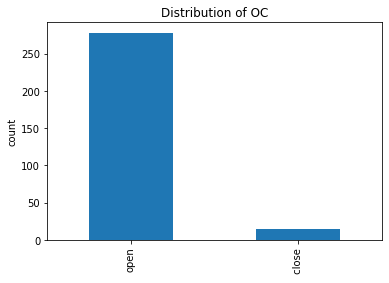

In [ ]:
#종속변수 'OC'를 내림차순 기준으로 시각화 

print(train['OC'].value_counts())

train['OC'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of OC')
plt.show()

#매우 불균형하게 분호되어 있음. (close 값이 상대적으로 너무 적음)

**DecisionTreeClassifier(의사결정나무)** 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

#의사결정나무 모델의 디폴트 값으로 진행하면 학습용 데이터가 100으로 과적합 상태가 발생됨 --> 추가 옵션(파라미터) 실행 

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.949


**수동으로 직접 넣지 않고 설정한 범위내에서 자동으로 최적의 파라미터를 구해주는 Grid Search 실행**

 **최적의 파라미터: Grid search**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'max_depth': range(4,21), 'min_samples_leaf': range(1,11)}  #의사결정나무의 깊이와 마지막 잎 노드의 개수를 범위를 지정해서 설정 

In [ ]:
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(4, 21),
                         'min_samples_leaf': range(1, 11)},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_)) #max_depth=4, min_samples_leaf=10이 최적의 파라미터 

Best Parameter: {'max_depth': 4, 'min_samples_leaf': 9}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.949


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.949


In [ ]:
tree= DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.949
시험용 데이터 정확도: 0.949


In [ ]:
# 머신러닝 모델에 활용할 변수 중요도 함수 생성(추후 나머지 모델들에게도 적용할 함수 )
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(train.columns[1:])  #종속변수를 제외한 나머지 변수들 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')  #x축의 변수명이 길어서 x축과 y축을 바꿔서 보기 편하게 만듦 
    plt.yticks(np.arange(n_features), train.columns[1:], rotation=20)   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 60)

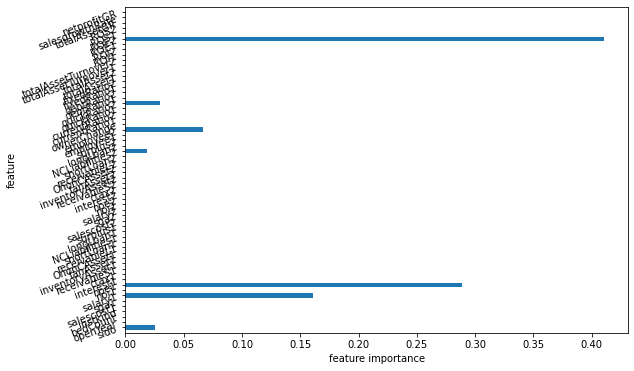

In [ ]:
plot_feature_importances_wisc(tree) #위에 지정한 함수 이름을 불러오고 생성한 tree 모델을 함수에 적용 

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.02517718 0.         0.         0.         0.         0.
 0.16120084 0.         0.28836421 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01862054 0.         0.
 0.         0.06653492 0.         0.         0.         0.
 0.02977177 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.41033054 0.         0.         0.         0.         0.        ]


In [ ]:
res = pd.DataFrame(result)
res["name"] = train.columns[1:]
res.rename(columns={0:'importance figure'}, inplace=True)
display(res.info())
display(res.sort_values(by='importance figure', ascending=False)) #중요도 수치로 내림차순 정렬

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   importance figure  60 non-null     float64
 1   name               60 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


None

,importance figure,name
54,0.410,ROE2
8,0.288,noe1
6,0.161,salary1
37,0.067,employee2
42,0.030,quickRatio2
0,0.025,sido
33,0.019,NCLiabilities2
36,0.000,employee1
35,0.000,surplus2
45,0.000,fixedRatio1


 **랜덤 포레스트 (Random forest)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators': range(1,50)}
grid_search_2=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print("Best Parameter: {}".format(grid_search_2.best_params_))

Best Parameter: {'n_estimators': 11}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search_2.best_score_))
print("Test set Score: {:.3f}".format(grid_search_2.score(X_test, y_test)))

Best Cross-validity Score: 0.953
Test set Score: 0.949


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=11, random_state=0) 
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))



학습용 데이터 세트 정확도: 0.991
시험용 데이터 세트 정확도: 0.932


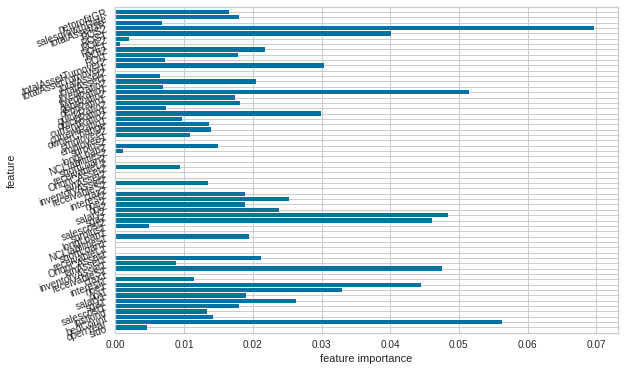

In [ ]:
#단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨

plot_feature_importances_wisc(forest) #위에서 만든 변수의 중요도 확인할 수 있는 함수 불러와서 forest 모델에 적용 

In [ ]:
result_2 = forest.feature_importances_
print("변수의 중요도:\n", result_2)

print('-'*50)

res = pd.DataFrame(result_2)
res["name"] = train.columns[1:]
res.rename(columns={0:'importance figure'}, inplace=True)
display(res.info())
display(res.sort_values(by='importance figure', ascending=False)) #중요도 수치로 내림차순 정렬


변수의 중요도:
 [0.00453646 0.05623481 0.01417002 0.01331038 0.01792152 0.02625845
 0.01908225 0.03304398 0.04443361 0.01148521 0.         0.04759257
 0.00875421 0.02123914 0.         0.         0.         0.0194695
 0.         0.00485679 0.0461141  0.04836808 0.0237989  0.01886266
 0.02527883 0.01887852 0.         0.013487   0.         0.
 0.00940083 0.         0.         0.00107257 0.01497027 0.
 0.01086771 0.01387247 0.01369835 0.00965209 0.0298578  0.00738891
 0.0180984  0.01745865 0.05144439 0.00700337 0.02046438 0.00644628
 0.         0.03039098 0.00726713 0.01791731 0.02182634 0.00067805
 0.00197355 0.04010312 0.06960855 0.00683357 0.01792302 0.01660493]
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   importance figure  60 non-null     float64
 1   name               60 non-null    

None

,importance figure,name
56,0.070,ROS2
1,0.056,openYear
44,0.051,debtRatio2
21,0.048,sga2
11,0.048,receivableS1
20,0.046,salescost2
8,0.044,noe1
55,0.040,ROS1
7,0.033,noi1
49,0.030,totalAssetTurnover1


 **그래디언트 부스팅 (Gradient Boosting)**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0)  #디폴트 값으로 옵션을 두고 그래디언트 부스팅을 적용한 gbrt모델 생성
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1(학습률)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

#학습용 데이터가 100이 나와서 과적합 상태---> 옵션(파라미터) 추가해서 과적합 문제 보완하는 과정을 추후 진행 

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.949


In [ ]:
param_grid= {'max_depth': range(1,20), 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [ ]:
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=param_grid, cv=3, refit=True)   #가장 최적의 패러미터가 나오면 이 값을 이 모델이 적용시기키 위해 refit=True 설정 

# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.04, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.9530


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.04, max_depth=1)  
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.966
시험용 데이터 세트 정확도: 0.949


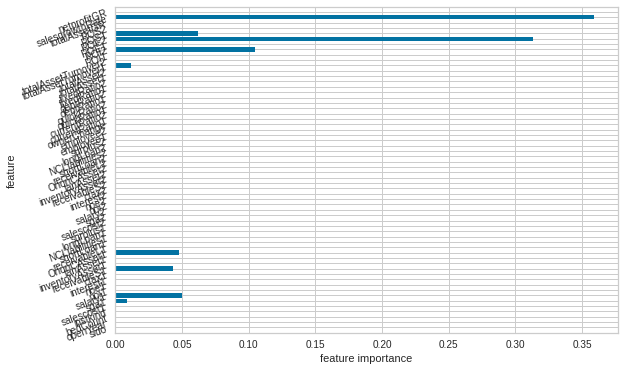

In [ ]:
plot_feature_importances_wisc(gbrt)  #위에서 생성한 중요도를 구하는 함수에 gbrt 모델 적용 

In [ ]:
result_3 = gbrt.feature_importances_
print("변수의 중요도:\n", result_3)

print('-'*50)

res = pd.DataFrame(result_3)
res["name"] = train.columns[1:]
res.rename(columns={0:'importance figure'}, inplace=True)
display(res.info())
display(res.sort_values(by='importance figure', ascending=False)) #중요도 수치로 내림차순 정렬


변수의 중요도:
 [0.         0.         0.         0.         0.         0.00853335
 0.04998049 0.         0.         0.         0.         0.04300792
 0.         0.         0.04789366 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01176711 0.         0.         0.10463555 0.
 0.31328251 0.06212641 0.         0.         0.358773   0.        ]
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   importance figure  60 non-null     float64
 1   name               60 non-null     object 
dtypes: float64(1), object(1)


None

,importance figure,name
58,0.359,salesgrowthRate
54,0.313,ROE2
52,0.105,ROI2
55,0.062,ROS1
6,0.050,salary1
14,0.048,OnonCAsset1
11,0.043,receivableS1
49,0.012,totalAssetTurnover1
5,0.009,sga1
38,0.000,ownerChange


 **K-최근접 이웃(K-Nearest Neighbor)모델**

**GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n = 50 #k의 값의 범위를 50까지 설정 
param_list = []
for i in range(1, n+1):
  param_list.append(i)

param_grid={'n_neighbors': param_list}

In [ ]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score = True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'n_neighbors': 5}
Best Cross-validity Score: 0.949
Test set Score: 0.949


**n_neigbors=5 일 때가 최적의 파라미터**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn5=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn5.fit(X_train, y_train) #n_neighbors=5일 때의 모델을 생성해서 적용 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("학습 데이터 세트 정확도: {:.3f}".format(knn5.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(knn5.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.949
시험용 데이터 세트 정확도: 0.949


##**4가지 모델 비교**

**정오 분류표(Confusion Matrx) 비교**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test의 값들과 개수를 보여줌 

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = gbrt.predict(X_test)
knn_pred = knn5.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))
print('KNN 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, knn_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

#4가지 모델다 시험용 데이터의 정확도가 0.949로 동일 

open      56
 close     3
Name: OC, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.949
[[ 0  3]
 [ 0 56]]
Random forest 시험용 데이터 세트 정확도:0.932
[[ 0  3]
 [ 1 55]]
Gradient boosting 시험용 데이터 세트 정확도:0.949
[[ 0  3]
 [ 0 56]]
KNN 시험용 데이터 세트 정확도:0.949
[[ 0  3]
 [ 0 56]]


 **교차검증 (Cross Validation) 비교**

In [ ]:
# 4가지 모델에 각각의 최적의 파라미터 적용해서 비교하기 


tree= DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, random_state=0)
tree.fit(X_train, y_train)

forest = RandomForestClassifier(n_estimators=13, random_state=0)
forest.fit(X_train, y_train)

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.04, max_depth=1)   
gbrt.fit(X_train, y_train)

knn3=KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score  #cv=15로 설정 
dt_scores = cross_val_score(tree, X_train, y_train, cv=15, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=15, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=15, scoring='accuracy')  
knn_scores= cross_val_score(knn3, X_train, y_train, cv=15, scoring='accuracy' )

print("="*50)
print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 
print("K-Nearest Neighbor: ", knn_scores)  

print("="*50)
print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 
print("K-Nearest Neighbor :{:.3f}".format(knn_scores.mean())) 

Accuracy
Decision tree:  [0.9375     0.9375     0.9375     0.9375     0.9375     0.9375
 0.9375     0.9375     0.9375     1.         1.         1.
 0.93333333 0.93333333 0.93333333]
Random forest:  [0.875      0.9375     0.9375     0.9375     0.9375     0.9375
 0.9375     0.9375     0.9375     1.         1.         1.
 0.93333333 0.93333333 0.93333333]
Gradient boosting:  [0.9375     0.9375     0.9375     0.9375     0.9375     0.9375
 0.9375     0.9375     0.9375     1.         1.         0.93333333
 0.93333333 1.         0.93333333]
K-Nearest Neighbor:  [0.9375     0.9375     0.9375     0.9375     0.9375     0.9375
 0.9375     0.9375     0.9375     1.         1.         1.
 0.93333333 0.93333333 0.93333333]
Accuracy mean
Decision tree :0.949
Random forest :0.945
Gradient boosting :0.949
K-Nearest Neighbor :0.949


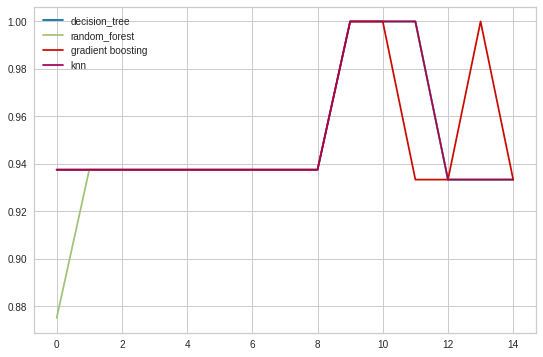

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient boosting', gbrt_scores],
            ['knn', knn_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

# 의사결정나무와 knn의 그래프는 완벽하게 일치함.

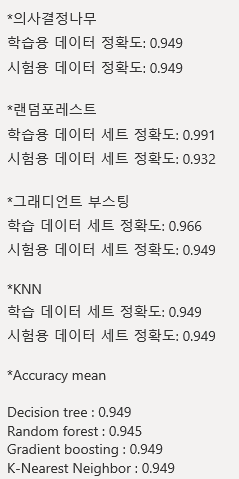

**시험용 데이터의 정확도는 랜덤포레스트를 제외한 의사결정나무, 그래디언트 부스팅, KNN 4가지 모델에서 동일하게 0.949로 나왔다. 추가로 교차검증 실행 후 정확도의 평균 역시 의사결정나무, 그래디언트 부스팅, KNN 4가지 모델에서 동일하게 0.949로 나왔다. 이 3가지 중에서 그래디언트 부스팅의 학습용 데이터 정확도가 0.966로 가장 높게 나왔기 때문에 최종적으로 Gradient Boosting 모델을 선택하였다.**

 **그래디언트 부스팅 top10 변수 시각화**

In [ ]:
result_3 = gbrt.feature_importances_
print("변수의 중요도:\n", result_3)

print('-'*50)

res3 = pd.DataFrame(result_3)
res3["name"] = train.columns[1:]
res3.rename(columns={0:'importance figure'}, inplace=True)
display(res3.info())
res3=res3.sort_values(by='importance figure', ascending=False) #중요도 수치로 내림차순 정렬

변수의 중요도:
 [0.         0.         0.         0.         0.         0.00853335
 0.04998049 0.         0.         0.         0.         0.04300792
 0.         0.         0.04789366 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01176711 0.         0.         0.10463555 0.
 0.31328251 0.06212641 0.         0.         0.358773   0.        ]
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   importance figure  60 non-null     float64
 1   name               60 non-null     object 
dtypes: float64(1), object(1)


None

In [ ]:
# 그래디언트 부스팅 중요도 top9 추출-->owerChange가 10위인데 중요도가 0%라 9위까지만 추출

res3=res3.head(9)
res3

,importance figure,name
58,0.359,salesgrowthRate
54,0.313,ROE2
52,0.105,ROI2
55,0.062,ROS1
6,0.050,salary1
14,0.048,OnonCAsset1
11,0.043,receivableS1
49,0.012,totalAssetTurnover1
5,0.009,sga1


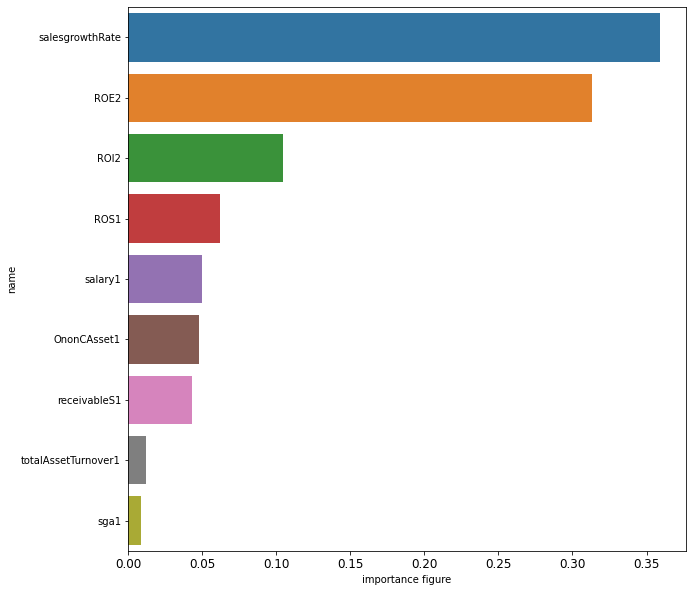

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.barplot(data = res3, y = 'name', x = 'importance figure')  # 그래디언트 모델의 Top 9의 중요 변수를 시각화로 보여줌 
ax.tick_params(axis='x', labelsize = 12)     # x축 눈금 크기 조절 + 회전---labelrotation = 80